
# Northwest Territories Collision Factors

# 1) Introduction



## 1.1 Motivation

Traffic accidents are a major public safety concern in the Northwest Territories (Government of Canada, 2023). Various factors such as weather, road conditions, vehicle types, and safety measures can significantly affect accident rates and outcomes. My aim is to investigate key contributing factors to accidents in the NWT. By analyzing data from the Northwest Territories Government, I can identify patterns and propose targeted interventions that could help reduce accident rates and improve road safety in the region. The outcomes of this analysis will offer valuable insights to policymakers, traffic management authorities, and road maintenance planners.


## 1.2 Guiding Questions

1. **What types of vehicles, and what characteristics of vehicles are most commonly involved in accidents?** <br>
Investigating the role of vehicle characteristics, model years, and driving maneuvers in road safety will help us understand which vehicles are most prone to collisions.
2. **How do environmental factors and potential road conditions influence the frequency of collisions?** <br>
I aim to assess the impact of weather, road surface conditions, light conditions on collision rates.
3. **How does the condition of the driver(s) at the time of the collision impact the accident?** <br>
I will explore how factors such as alcohol use and driver inexperience influence accident outcomes.
4. **How do roadway classifications and compositions influence the frequency of collisions?** <br>
I will explore how different road classes potentially affect collision amounts


# 2) Dataset

## 2.1 Source and Licensing


Government of Canada, R. C. M. P. (2023). Northwest Territories RCMP release statistics for Operation Impact. Retrieved from https://www.rcmp-grc.gc.ca/en/news/2023/northwest-territories-rcmp-release-statistics-operation-impact
Territories, G. of N. (n.d.). Open government licence northwest territories. Retrieved from https://www.gov.nt.ca/en/open-government-licence-northwest-territories
Territories, G. of N. (N.d.). Retrieved from https://opendata.gov.nt.ca/dataset/?tags=highways
<br>
I have the right to use the data under the Open Government License Northwest Territories, and I will comply with all attribution requirements by including the specified attribution statement: 'Contains information licensed under the Open Government License Northwest Territories.'

## 2.2 Dataset Overview

My project will focus on the Collision Dataset for the Northwest Territories dataset from the Government of Northwest Territories website. It is publicly available and houses annual data from the motor vehicle collision report investigations conducted by the Royal Canadian Mounted Police (RCMP). The Traffic Collision Information System (TCIS) is a computer-based system that compiles information on traffic collisions throughout the Northwest Territories (NWT). I have the right to use the data under the Open Government License Northwest Territories, and I will comply with all attribution requirements by including the specified attribution statement: 'Contains information licensed under the Open Government License Northwest Territories. My focus of analysis would be for the years 2000-2022. The dataset is in .xls format and is a reliable dataset that has undergone 60 data integrity checks by the RCMP ensuring its credibility. The dataset contains both categorical (nominal) and numerical variables, with a data dictionary that provides the mapping values of these variables. It also ensures uniformity in the dataset format across the years of collection. I have 35,074 rows and 93 variables spanning collision, vehicle, and person levels, providing a multidimensional view of the data. Each row in the dataset represents a collision event, capturing details such as the time and location of the collision, weather and road conditions, the severity of the accident, and information about the vehicles involved. Each variable in the dataset provides specific information about different key aspects of the collision, ranging from road classification and surface condition to the number of persons injured or killed as well as the vehicle and occupant details.


## 2.3 Data Cleaning and Wrangling



### 2.3.1 Data Mapping

As the data contains categories that are stored in the excel file as codes, I must convert these codes into human readable values. This is the primary goal of this section of my code

In [ ]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# df_orig = pd.read_excel("/content/combined.xlsx")
df_orig = pd.read_excel("combined.xlsx")
df = df_orig.copy()
df.head()

,C_NREC,C_REP,C_PROV,C_POLC,C_CASE,C_SCATT,C_YEAR,C_MNTH,C_MDAY,C_WDAY,...,C_UNITS,C_DIR,C_REF,C_SPEC,C_ALC,C_ORV,C_CREC,C_DSTMP,C_DRCV,C_NREC.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,1.0,x,11.0,NT100-32,2000-00042,1.0,2000.0,1.0,1,6,...,NaN,NaN,NaN,McDonald's parking lot,2.0,2.0,NaN,NaT,NaT,NaN
2,2.0,NaN,11.0,NT100-32,2000-00042,1.0,2000.0,1.0,1,6,...,NaN,NaN,NaN,McDonald's parking lot,2.0,2.0,NaN,NaT,NaT,NaN
3,3.0,NaN,11.0,NT100-32,2000-00042,1.0,2000.0,1.0,1,6,...,NaN,NaN,NaN,McDonald's parking lot,2.0,2.0,NaN,NaT,NaT,NaN
4,4.0,NaN,11.0,NT100-32,2000-00042,1.0,2000.0,1.0,1,6,...,NaN,NaN,NaN,McDonald's parking lot,2.0,2.0,NaN,NaT,NaT,NaN


These are all codes that are mapped from the data dictionary that I was provided.

In [ ]:
vehicle_codes = {
    '1': 'Passenger cars',
    '2': 'Passenger van - multi-purpose vehicles with van bodies designed primarily for passenger transport',
    '3': 'Light utility vehicles - vehicles on truck chassis designed for passenger transport and for off-road use (e.g. Blazer, Bronco)',
    '4': 'Pickup trucks under 4536 kg. - pickups with open load bed, with camper top, etc.',
    '5': 'Panel cargo/vans under 4536 kg. - panel or window type van designed primarily for carrying goods',
    '6': 'Other trucks and vans under 4536 kg. - unspecified, or any other types of LTVs that do not fit into the above categories (e.g. delivery or service vehicles, small tow trucks, etc.)',
    '7': 'Unit trucks over 4536 kg - all heavy unit trucks, with or without a trailer (e.g. water trucks)',
    '8': 'Road tractor - with or without a semi-trailer',
    '9': 'School bus',
    '11': 'Urban transit bus',
    '12': 'Inter-city bus',
    '14': 'Motorcycle - motorized two or three wheeled vehicles capable of speeds greater than 70 km/h',
    '15': 'Limited speed motorcycle - motorized two or three wheeled vehicles with top speed less than 70 km/h (e.g. small scooters, mopeds)',
    '16': 'Off road vehicles – e.g. ATVs',
    '17': 'Bicycle - any number of wheels',
    '18': 'Purpose-built motorhome - excludes pickup campers',
    '19': 'Farm equipment',
    '20': 'Construction equipment',
    '22': 'Snowmobile',
    'QQ': 'Choice is other than preceding values',
    'UU': 'Unknown'
}
vehicle_manoeuvres = {
    "1": "Going straight ahead",
    "2": "Turning left",
    "3": "Turning right",
    "4": "Making U-turn",
    "5": "Changing lanes",
    "6": "Merging into traffic",
    "7": "Reversing",
    "8": "Overtaking, passing",
    "9": "Negotiating a curve",
    "10": "Slowing or stopped in traffic",
    "11": "Starting in traffic",
    "12": "Leaving roadside",
    "13": "Stopped/parked legally – excludes vehicles stopped in traffic",
    "14": "Stopped/parked illegally – excludes vehicles stopped in traffic",
    "15": "Swerving to avoid collision",
    "16": "Run-away or roll-away vehicle",
    "21": "Vehicle manoeuvre unspecified",
    "QQ": "Choice is other than the preceding values – e.g. vehicle being pushed or walked",
    "UU": "Unknown – e.g. hit-and-run cars"
}

vehicle_jur = {
    '01': 'Newfoundland',
    '02': 'Prince Edward Island',
    '03': 'Nova Scotia',
    '04': 'New Brunswick',
    '05': 'Quebec',
    '06': 'Ontario',
    '07': 'Manitoba',
    '08': 'Saskatchewan',
    '09': 'Alberta',
    '10': 'British Columbia',
    '11': 'Northwest Territories',
    '12': 'Yukon Territory',
    '13': 'Canadian Military',
    '14': 'Diplomatic',
    '15': 'All States of the USA',
    '16': 'Other Foreign',
    '17': 'No licence',
    '18': 'Nunavut',
    'QQ': 'Choice is other than preceding values',
    'UU': 'Unknown'
}

vehicle_light = {
    '1': 'No lights on - includes vehicles not equipped with headlights',
    '2': 'Daytime running lights on',
    '3': 'Headlights on',
    '4': 'Parking lights only on',
    '5': 'Fog or auxiliary lights on',
    'Q': 'Choice is other than preceding values',
    'U': 'Unknown'
}

weather_conditions= {
    '1': 'Clear/Sunny',
    '2': 'Cloudy',
    '3': 'Raining',
    '4': 'Snowing',
    '5': 'Sleet,hail,freezing rain',
    '6': 'Visibility Limitation',
    '7': 'Strong Wind',
    'Q': 'Other',
    'U': 'Unknown',
}
road_surface_labels = {
    '1': 'Dry/normal',
    '2': 'Wet',
    '3': 'Snow',
    '4': 'Slush',
    '5': 'Icy',
    '6': 'Loose Debris',
    '7': 'Muddy',
    '8': 'Oil',
    '9': 'Flooded',
    'Q': 'Other',
    'U': 'Unknown',
}
light_condition = {
    '1': 'Daylight',
    '2': 'Dawn',
    '3': 'Dusk',
    '5': 'Darkness',
    'U': 'Unknown',
}
severity_labels = {
    '1.0': 'Fatal',
    '2.0': 'Injury',
    '3.0': 'Property Damage',
    'U': 'Unknown'
}
month_mapping = {
    '1.0': 'January', '2.0': 'February', '3.0': 'March', '4.0': 'April',
    '5.0': 'May', '6.0': 'June', '7.0': 'July', '8.0': 'August',
    '9.0': 'September', '10.0': 'October', '11.0': 'November', '12.0': 'December',
    'UU': 'Unknown'
}

day_of_week_mapping = {
    '1': 'Monday', '2': 'Tuesday', '3': 'Wednesday', '4': 'Thursday',
    '5': 'Friday', '6': 'Saturday', '7': 'Sunday', 'U': 'Unknown'
}

roadway_configuration_mapping = {
    '1': 'Non-intersection e.g. “mid-block”', '2': 'Intersection-Related',
    '3': 'Intersection with parking lot entrance/exit, private driveway or laneway',
    '4': 'Railway level crossing', '5': 'Bridge, overpass, viaduct',
    '6': 'Tunnel or underpass', 'Q': 'Other', 'QQ': 'Other',
    'U': 'Unknown', 'UU': 'Unknown'
}
road_classification_1_mapping = {
    '1': 'Urban', '2': 'Rural', 'U': 'Unknown'
}

road_classification_2_mapping = {
    '2': 'Arterial', '3': 'Collector', '4': 'Local', 'Q': 'Other', 'U': 'Unknown'
}

road_classification_3_mapping = {
    '1': 'One – way, two lane', '2': 'One – way, multi-lane', '3': 'Undivided, two – way, two lane',
    '4': 'Undivided, two – way, multi-lane', '5': 'Divided, barrier median',
    '6': 'Divided, with median, no barrier', '7': 'Divided, type of divider not specified',
    'Q': 'Other', 'U': 'Unknown'
}

road_condition_mapping = {
    '1': 'Good', '2': 'Potholes, ruts, bumps', '3': 'Under construction, repair',
    '4': 'Uneven pavement surface', '5': 'Worn - i.e. low coefficient of friction',
    '6': 'Obscured or faded pavement markings', 'Q': 'Other',
    'U': 'Unknown'
}

posted_speed_limit_mapping = {
    '1': '30 km/h or less', '2': '35 or 40 km/h', '3': '45 or 50 km/h',
    '4': '60 km/h', '5': '70 km/h', '6': '80 km/h', '7': '90 km/h',
    '8': '100 km/h', '9': '110 km/h or more', 'U': 'Unknown'
}

traffic_control_mapping = {
    '1': 'Traffic signals fully operational', '2': 'Traffic signals in flashing mode',
    '3': 'Stop sign', '4': 'Yield sign', '5': 'Warning sign',
    '6': 'Pedestrian cross walk', '7': 'Police officer',
    '8': 'School guard, flagman', '9': 'School crossing',
    '10': 'Reduced speed zone', '11': 'No passing zone sign',
    '12': 'Markings on road - eg. no passing', '13': 'School bus stopped - lights flashing',
    '14': 'School bus stopped - signals not flashing', '15': 'Railway crossing with signals, or signals and gates',
    '16': 'Railway crossing with signs only', '17': 'Control device not specified',
    '18': 'No control present', 'QQ': 'Other',
    'UU': 'Unknown'
}

road_material_mapping = {
    '1': "Asphalt",
    '2': "Concrete",
    '3': "Gravel",
    '4': "Earth, dirt",
    '5': "Chip-seal",
    '6': "Brick, cobblestone",
    '7': "Wooden – e.g. bridge",
    '8': "Steel deck – e.g. bridge",
    '9': "Ice road",
    "Q": "Other",
    "U": "Unknown"
}

vehicle_speed_mapping = {
    "1": "Less than 20 km per hour – includes stopped in traffic",
    "2": "20 – 29 km per hour",
    "3": "30 – 39 km per hour",
    "4": "40 – 49 km per hour",
    "5": "50 – 59 km per hour",
    "6": "60 – 69 km per hour",
    "7": "70 – 79 km per hour",
    "8": "80 – 89 km per hour",
    "9": "90 – 99 km per hour",
    "10": "100 – 109 km per hour",
    "11": "110 – 119 km per hour",
    "12": "120 km per hour or more",
    "NN": "Parked",
    "UU": "Unknown"
}

vehicle_headlights_mapping = {
    '1': "No lights on - includes vehicles not equipped with headlights",
    '2': "Daytime running lights on",
    '3': "Headlights on",
    '4': "Parking lights only on",
    '5': "Fog or auxiliary lights on",
    "Q": "Other",
    "U": "Unknown"
}


In [ ]:
column_mappings = {
    'V_MNVR' : vehicle_manoeuvres,
    'C_WTHR': weather_conditions,
    'C_LITE': light_condition,
    'V_TYPE': vehicle_codes,
    'C_RSUR': road_surface_labels,
    'C_SEV': severity_labels,
    'C_MNTH': month_mapping,
    'C_WDAY': day_of_week_mapping,
    'C_RCFG': roadway_configuration_mapping,
    'C_RCL1': road_classification_1_mapping,
    'C_RCL2': road_classification_2_mapping,
    'C_RCL3': road_classification_3_mapping,
    'C_RCON': road_condition_mapping,
    'C_SPED': posted_speed_limit_mapping,
    'C_TRAF': traffic_control_mapping,
    'C_RMTL': road_material_mapping,
    'V_SPED': vehicle_speed_mapping,
    'V_LITE': vehicle_headlights_mapping
}


In [ ]:
# Call this function if you want to rename your categories based off their conversion dictionaries
# This function does 2 main things
# 1. Checks if the value isna - if so return the string 'unkown;
# 2. If its not then it reads the value in the dictionary and then returns what it corresponds to
def customRename(value, renameDict, custom=False, splitBy='-'):
    if pd.isna(value):
        return 'Unknown'  # Handle NaN values by returning 'Unknown'
    value = str(value)  # Convert value to string for consistent matching
    if renameDict is None: # If you dont pass a dictionary to map off using
      return value
    convertedVal =  renameDict.get(value, value)

    # If you want to split based off a delimiter.
    if custom:
      sol = convertedVal.split(splitBy)[0]
      return sol.split(splitBy)[0] # i guess they want me to suffer thats cool lol.

    return convertedVal

def renameColumnUsingDict(df, columnName, renameDict=None, custom=False, splitBy='-'):
  # print(vehicle_codes.keys())
  df.loc[:, columnName] = df[columnName].apply(customRename, args=(renameDict, custom, splitBy ))
  return df


In [ ]:
for column, mapping in column_mappings.items():
    df = renameColumnUsingDict(df, column, mapping)

<ipython-input-4-cda2ab6d8036>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Unknown' 'Property Damage' 'Property Damage' ... 'Property Damage'
 'Property Damage' 'Property Damage']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, columnName] = df[columnName].apply(customRename, args=(renameDict, custom, splitBy ))
<ipython-input-4-cda2ab6d8036>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Unknown' 'January' 'January' ... 'December' 'December' 'December']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, columnName] = df[columnName].apply(customRename, args=(renameDict, custom, splitBy ))


### 2.3.2 Column Selection and Cleanup

My data set is incredibly vast - not all columns are required. I drop columns that I won't use and clean up things such as removing duplicates.

In [ ]:
columns_to_drop = [
    'C_NREC', 'C_REP', 'V_REP', 'C_CASE', 'C_STRT1', 'C_STRT2', 'V_VIN', 'P_ID', 'V_LICJ','C_HWY','C_KM','C_KM2','C_HWY2','C_DIST','C_UNITS','C_DIR','C_REF','C_SPEC','C_DSTMP','C_DRCV',
    'C_NREC.1','C_CREC', 'C_ORV', 'C_COMM','C_LTYP','C_KM','P_RCLS','P_PACT','P_ABAG','P_PUSE','P_SAFE','P_ISEV','P_EJCLC','P_PSN','P_LICS','P_YLIC','P_LCLS','V_LDST','V_DANG','V_TRLR',
    'V_EMER','V_USE','V_DIR','V_NOCC','V_ID','C_RMTL','C_ALITE','C_HRUN','C_PROV','C_POLC','C_SCATT', 'C_CONF','C_RALN','C_PRIOR','P_EJCT','V_CF1','V_CF2','V_CF3','V_CF4','V_PRIOR','V_DSEV',
    'V_IMPL','V_EVT1','V_EVT2','V_EVT3','C_DEAD','C_INJ','C_VEHS',
]
df_clean = df.dropna(thresh=int(0.5*df.shape[1]))
df_clean = df_clean.drop_duplicates()
df_reduced = df_clean.drop(columns=columns_to_drop)

df_reduced.shape

(35051, 26)

In [ ]:
# Define specific fields for clustering and vehicle analysis
vehicleFields = {'V_TYPE':'Vehicle Type', 'V_LITE':'Use of Vehicle Headlights', 'V_MNVR': 'Vehicle Manoeuvre',
                'V_YEAR':'Vehicle Model Year', 'V_LICJ':'Vehicle Licence Plate Jurisdiction', 'V_REP' : 'Vehicle Replicate'}
timeFields = {'C_YEAR' : 'Year of Collision', 'C_MNTH': 'Month of Collision', 'C_MDAY': 'Day of the Month', 'C_HOUR': 'Hour of Collision', 'C_WDAY': 'Day of the Week'}
atmoFields = {'C_WTHR': 'Weather Condition', 'C_LITE': 'Light Condition', 'C_ALITE': 'Artificial Light Condition'}
peopleFields = {'P_SEX': 'Person Sex', 'C_SEV': 'Severity  of Collision', 'C_PRIOR': 'Major Contributing Factor'}
roadFields = {'C_SPED': 'Posted Speed Limit', 'C_RCL3' : 'Road Class 2', 'C_RMTL' : 'ROAD MATERIAL', 'C_RSUR': 'ROAD SURFACE', 'C_RCON': 'ROAD CONDITION'}
allFields = {**vehicleFields, **timeFields, **atmoFields, **peopleFields, **roadFields}
excludeFields = ['V_REP', 'V_LICJ', 'V_YEAR'] # Fields to exclude for later clustering stuff
vehicleDf =  df[vehicleFields.keys()]
allDf = df[allFields.keys()].drop(columns=excludeFields)
# Only keep the first vehicle record to avoid duplicates.
vehicleDf = vehicleDf[vehicleDf['V_REP'] == 'x']


In [ ]:
#cleaning the Community Name column
df['C_COMM'] = df['C_COMM'].str.strip()

#rechecking unique values
print("Unique values for Community Name:")
print(df['C_COMM'].unique())

Unique values for Community Name:
[nan 'YELLOWKNIFE' 'HAY RIVER' 'FORT SMITH' 'FORT MCPHERSON' 'AKLAVIK'
 'FORT LIARD' 'ENTERPRISE' 'NAHANNI BUTTE' 'INUVIK' 'FORT PROVIDENCE'
 'FORT SIMPSON' 'DETTAH' 'FORT RESOLUTION' 'RAE' 'EDZO' 'TULITA' 'WRIGLEY'
 'TUKTOYAKTUK' 'NORMAN WELLS' 'DELINE' 'FORT GOOD HOPE' 'JEAN MARIE RIVER'
 'TSIIGEHTCHIC' 'SACHS HARBOUR' 'KAKISA' 'HOLMAN' "LUTSEL K'E"
 'COLVILLE LAKE' 'TROUT LAKE' 'WHA TI' 'RAE LAKES' 'PAULATUK' 'WEKWETI']


### 2.3.3 Unknown Handling

The data frequently contains values that fall under the unknown category. I decided that the best way to deal with this is by removing it.

In [1]:
# Remove rows with unkown values
unknown_values = ['Unknown', 'U','UU','UUU','UUUU']
df_cleaned = df_reduced[~df_reduced.isin(unknown_values).any(axis=1)]
df_cleaned.shape
# I create separate row removals - as I dont want to remove mroe than I need to.
vehicleDf_cleaned = vehicleDf[~vehicleDf.isin(unknown_values).any(axis=1)]
allDf_cleaned = allDf[~allDf.isin(unknown_values).any(axis=1)]
# print(df_cleaned.shape)
# print(vehicleDf_cleaned.shape)
# print(allDf_cleaned.shape)

NameError: name 'df_reduced' is not defined

### 2.3.4 Data Transforming

I must ensure the data is fit to be used for the analysis - this segment primarily deals with ways I do that.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17475 entries, 1 to 35064
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C_YEAR  17475 non-null  float64
 1   C_MNTH  17475 non-null  object 
 2   C_MDAY  17475 non-null  object 
 3   C_WDAY  17475 non-null  object 
 4   C_HOUR  17475 non-null  object 
 5   C_SEV   17475 non-null  object 
 6   C_RCFG  17475 non-null  object 
 7   C_WTHR  17475 non-null  object 
 8   C_LITE  17475 non-null  object 
 9   C_RCL1  17475 non-null  object 
 10  C_RCL2  17475 non-null  object 
 11  C_RCL3  17475 non-null  object 
 12  C_RSUR  17475 non-null  object 
 13  C_RCON  17475 non-null  object 
 14  C_TRAF  17475 non-null  object 
 15  C_SPED  17475 non-null  object 
 16  V_YEAR  17475 non-null  object 
 17  V_TYPE  17475 non-null  object 
 18  V_LITE  17475 non-null  object 
 19  V_SPED  17475 non-null  object 
 20  V_MNVR  17475 non-null  object 
 21  P_SEX   17475 non-null  object 
 22  P_A

In [ ]:
categorical_columns = [
    'C_MNTH', 'C_WDAY', 'C_SEV', 'C_RCFG', 'C_WTHR', 'C_LITE',
    'C_RCL1', 'C_RCL2', 'C_RCL3', 'C_RSUR', 'C_RCON', 'C_TRAF', 'C_SPED',
    'V_TYPE', 'V_LITE', 'V_SPED', 'V_MNVR', 'P_SEX',
    'P_DLIC', 'P_DBAC','V_YEAR','P_AGE'
]
numeric_columns = [
    'C_YEAR', 'C_HOUR','C_MDAY'
]

boolean_columns = ['C_ALC']

In [ ]:
df_cleaned = df_cleaned.copy()
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')
for col in numeric_columns:
    df_cleaned[col] = df_cleaned[col].astype('int')
for column in boolean_columns:
    df_cleaned.loc[:, column] = df_cleaned[column].apply(lambda x: True if x == 1 else False if pd.notna(x) else x)

<ipython-input-12-ff526ec304b6>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, column] = df_cleaned[column].apply(lambda x: True if x == 1 else False if pd.notna(x) else x)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17475 entries, 1 to 35064
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C_YEAR  17475 non-null  int64   
 1   C_MNTH  17475 non-null  category
 2   C_MDAY  17475 non-null  int64   
 3   C_WDAY  17475 non-null  category
 4   C_HOUR  17475 non-null  int64   
 5   C_SEV   17475 non-null  category
 6   C_RCFG  17475 non-null  category
 7   C_WTHR  17475 non-null  category
 8   C_LITE  17475 non-null  category
 9   C_RCL1  17475 non-null  category
 10  C_RCL2  17475 non-null  category
 11  C_RCL3  17475 non-null  category
 12  C_RSUR  17475 non-null  category
 13  C_RCON  17475 non-null  category
 14  C_TRAF  17475 non-null  category
 15  C_SPED  17475 non-null  category
 16  V_YEAR  17475 non-null  category
 17  V_TYPE  17475 non-null  category
 18  V_LITE  17475 non-null  category
 19  V_SPED  17475 non-null  category
 20  V_MNVR  17475 non-null  category
 21  P_SEX   17475 non

In [ ]:
# This function bins categories that make up less than 5% of a column
# And converts them into an 'Others' category.
def binLowFreq(df, column, threshold=0.05):
  # Calculate the frequency of each category
  freq = df[column].value_counts(normalize=True) # normalize will do the math for us.

  lowFreqCat = freq[freq < threshold].index

  # Create a new column including binned values
  newColName = f"{column}_bins"
  df.loc[:, newColName] = df[column].apply(lambda x: 'Others' if x in lowFreqCat else x)

  return df

# 3) Analysis


## 3.1 What types of vehicles, and what characteristics of vehicles are most commonly involved in accidents?

To investigate this question I decide to investigate the following vehicle related fields:
1. V_LICJ - This is the vehicle license jurisdition, I investigated this to see if drivers/vehicles from certain jurisdictions were more prone to being invovled in collisions
2. V_YEAR - This is the vehicle license year, I investigated this to see if vehicles from certain licence years were more prone to be in collisions. It could potentially unveil a change in collision amount - it may indicate changes in vehicle design as an example.
3. V_LITE - This is the vehicle headlight usage, I investigated this to see if the vehicle headlight usage resulted in more/less collisions.
4. V_TYPE - This is the vehicle type, I investigated this to see if certain vehicles types potentially had design issues that may result in them being involved in more or less collisions
5. V_MNVR - This is the maneuver the vehicle was engaged in during the collision, I investigated this to see this if certain maneuevers could cause a higher collision rate, and if I can learn from this to influence our own driving.

In [ ]:
# I will primarily be dealing this subset of the main dataframe
# It is created during data cleaning and contains the columns I primarily want to investigate
vehicleDf_cleaned.shape

(18404, 6)

In [ ]:
# Simple function that'll draw a stacked histogram
def drawStackdHisto(df, xCol='V_YEAR', hueCol='V_TYPE',
                    _xlabel='Vehicle Model Year', _ylabel='Count',
                    _title='Stacked Histogram of Vehicle Model Year by Vehicle Type'):
  # Plot the stacked histogram
  plt.figure(figsize=(10, 7))
  sns.histplot(data=df, x=xCol, hue=hueCol, stat='count',
               multiple='stack', palette=sns.color_palette("rocket", len(df[hueCol].unique())), legend='auto')

  # Add labels and title
  plt.xlabel(_xlabel)
  plt.ylabel(_ylabel)
  plt.title(_title)
  plt.xticks(rotation=45)
  plt.show()

### 3.1.1 Investigating Vehicle Licence Jurisdiction

In [ ]:
# Rename the columns - and then I use tableau to plot this histogram
vehicleDf_cleaned = renameColumnUsingDict(vehicleDf_cleaned, 'V_LICJ', vehicle_jur, custom=True)

**Instructions on how to recreate in tableau:** <br>
*Note: This will provide the baseline instructions on how to create something in tableau. Additional details will be added when needed for each different graph.*

1.   *Download cleaned dataframe as an excel file (I do this later in the analysis after I clean everything)*
2.   *Add file as a datasource - drag and drop the file into tabluea's data tab*
3. *Open a new sheet to start plotting a graph - bottom of the screen select the create a new sheet button*
4. *Drag the cnt(sheet1) column to the rows tab at the top of the screen - this sets your y axis*
5. *Drag your x axis variable to your columns - these are things like V_TYPE, V_MNVR etc. Ensure they are set as discrete (right click the variable and check discrete on it)*
6. *Edit Graph name by double clicking it, and entering what you need*
7. *Sort in descending order by clicking the sort icon that appears next to the y axis label - alternatively there is a sort icon at the top of screen that you can click on*
8. *Edit y axis name to be relevant - Number of collisions as an example*
9. *Ctrl click and drag the cnt(sheet1) variable in your rows to the Label mark in the middle left of your screen under the `marks` section - this will label each bar with the cnt(sheet1)*
10. *Right click the cnt(sheet1) - select quick table calculation -> percentage of total. This will make it so the number displayed on the bars is a percentage of the total number of collisions instead*
11. *You can edit the color to your choosing. Simply select the color mark - and choose your preferred color*


![](https://drive.google.com/uc?export=view&id=1GCGYhXfbnaNdew1o8DaH5hUbajOu902q)

From the graph I notice that most collisions - ~94% of them take place with vehicles that are licensed under the NWT. The second most number of collisions ~3% are from Alberta. This suggests to us that we should focus efforts primarily on making sure that we focus on in province education of collisions. We should also secondarily consider and investigate why Albertan vehicles are more likely to be in collisions - while this number is likely primarily a representative of the differenc in vehicle populatins in one part. It doesn't change the fact that this is a point of interest for my current population. And we should investigate and look into policies to help address it.

### 3.1.2 Investigating Vehicle Licence Year


![](https://drive.google.com/uc?export=view&id=1ZPS9W1aLMdbO8TYhl6linCU2aBjDuUoS)

This histogram reveals that the number of collisions follow a a relatively normal distribution. This is first and foremost likely a reflection of differnt vehicle licence year populations - older vehicles and newer vehicles are likely to be less popular. Ultimately, this allows us to conclude that we can rule out the vehicle licence year as being a significant factor in terms of how likely a vehicle is to be involved in a collision.

### 3.1.3 Investigating Vehicle Headlight Usage

In [ ]:
vehicleDf_cleaned = renameColumnUsingDict(vehicleDf_cleaned, 'V_LITE', vehicle_headlights_mapping, custom=True)

![](https://drive.google.com/uc?export=view&id=1tzdk4Ar5EkY2tCyYcdsmtp91uzQbuak0)


This histogram reveals that most collisions involve some level of headlights being on - ~37% and ~35% for headlights on and daytime running lights on respectively. We also see roughly ~28% of collisions involved having no lights on. This seems to indicate that despite headlights being used, cars likely are not using them correctly or they are insufficient, as most collisions involved using headlights. The data seems to indicate that we should investigate more deeply into how and when people use their headlights  - we know as drivers that shining a bright headlight during the day may be an issue - similarly a lack of correct headlight usage during the night may also be an issue. This also ties in with the lack of headlight usage, as one may expect intuitively.

### 3.1.4 Investigating Vehicle Type


**Colouring by variable in Tableau, and using percentages instead of counts:** <br>
*Note: These are additional instructions to help recreate visualizations. Ensure you follow previous instructions first*

1.   *To change the color, simply drag the variable you want to use as the color to the color mark*
2. *You can change the palette used by selecting the color mark again and then clicking edit colors -> select a palette you want -> press assign palette -> confirm selection by hitting apply and then ok.*
3. *To make your y axis show percentages insted of counts, simply right click the cnt(sheet1) in the rows segment*
4. *Then select quick table calculation - percentage of total*


In [ ]:
vehicleDf_cleaned = renameColumnUsingDict(vehicleDf_cleaned, 'V_TYPE', vehicle_codes, custom=True)
# We will bin the categories that make up less than 5% of the field to help with interpretability.
binnedDf = binLowFreq(vehicleDf_cleaned, 'V_TYPE')

<ipython-input-14-fb57ef70e80f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, newColName] = df[column].apply(lambda x: 'Others' if x in lowFreqCat else x)


![](https://drive.google.com/uc?export=view&id=1GW3ELabSs8j9rfvKtF_4QMcng4kjkafb)

![](https://drive.google.com/uc?export=view&id=1pJ9oJms02uMw1xI4-OGqeZPejRvs5U29)

The first graph, reveals that a large number of vehicle types form a tiny number of collisions. We may initially want to naively believe that this indicates that they may support designs that make them less accident prone. But, as we look more closely at the graph it becomes clear that it is simply a set of vehicles who are of extremely niche types. And primarily servers as a reflection of their quantities. So we decide to group them up in an others bin if they form less then 5% of the total number of collisions - to help us investigate these niche vehicle types as a broader group. <br>

The second graph shows us that most collisions are pickup trucks - ~36% of all collisions being them. We also see that passenger cars and light utility vehicles are next, with ~29% and ~20% of total collisions each respectively.
This suggests that those vehicle types, and particularly pickup trucks are highly prone to being in collisions.

### 3.1.5 Investigating Vehicle Maneuvers

In [ ]:
vehicleDf_cleaned = renameColumnUsingDict(vehicleDf_cleaned, 'V_MNVR', vehicle_manoeuvres, custom=True)
binnedDf = binLowFreq(vehicleDf_cleaned, 'V_MNVR')
# to allow us to do tableau visualizations.
vehicleDf_cleaned.to_excel('vehicleDf_cleaned.xlsx')
binnedDf.to_excel('binnedDf.xlsx')

<ipython-input-14-fb57ef70e80f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, newColName] = df[column].apply(lambda x: 'Others' if x in lowFreqCat else x)


![](https://drive.google.com/uc?export=view&id=1vf0dAbzI2gQPsMMlYvO0QLbe9T66HYJ4)

![](https://drive.google.com/uc?export=view&id=1owYp1zQ5ne5acPdssifMmQXl9UoMUVlx)



The first graph, reveals that a large number of vehicle maneuvers form a tiny number of collisions. This reveals to use that certain maneuvers are less likely to be part of collisions. It is worth nothing one of these categories - 'swerving to avoid collisions' is incredibly small. This could suggest that if attempting to avoid collisions is effective at doing so - due to its relatively small proportion. Another point of interest emerges in this graph is that the number of collisions going left is almost double that of going right. This suggests that turning isnt equally risky - and it makes sense, as a driver ans going left more freqeuntly involves making a call on when to move than going rights, which also tend to be tighter turns. <br>

The second graph shows us that most collisions are involve vehicles going straight ahead - ~31%. This likely means that individuals lose focus when doing tasks that they consider most mundane, and servers to inform us that this should be further emphasized. We also see that stopping or parking legally makes up ~25% of all collisions, indicating that a lot of collisions involve vehicles colliding with parked vehicles. Suggesting that people should be more careful when they park, but also that we may need to consider the infrastructure we have to see if we can make changes to minimize the odds of someone doing so. Finally we also see that the other manuever categories make up roughly the same percentage of collisions. This includes reversing, slowing in traffic and other types of maneuvers.

### 3.1.6 Investigating Vehicle Maneuvers vs Vehicle Type

**Stacking and colouring variables in Tableau, and using percentages of stack in each bar:** <br>
*Note: These are additional instructions to help recreate visualizations. Ensure you follow previous instructions first*

1.   *To convert to a stack bar graph, simply drag the variable you want to the color mark*
2. *This will create that variable as a stack instead*
3. *To update it to show percentages of the bar right click the cnt(sheet1) label mark, and then click compute using -> Table(down). This will make it so tableau displays the percentages as the amount of the total bar instead*



![](https://drive.google.com/uc?export=view&id=1JXCbXXoK7susomoQGz4W12957Krs-3JV)

This graph reconfirms that most collisions involve vehicles going straight ahead and stopping or parking legally. For vehicles in the 'other' category 42% of their collisions had them going straight ahead, potentially suggesting that there maybe something lacking with the general law or vehicle design, that makes this a more risk prone manuever for these niche vehicle types. The graph also shows that interesting that 17% of pickup truck collisions involved reversing, in contrast only 7% of passenger car collisions being reversing. This is interesting as on average ~13% of all collisions are reversing related. Suggesting that pickup trucks are significantly more likely to be part of collisions and the opposite is true of passenger cars. We can potentially gain to learn from why this is the case, and likely influence vehicle design or architecture using this information. We also notice that pickup trucks are less likely to be involved in parking related collisions. This is likely as due to their larger size, they tend to park in more specific areas, that are likely less populated. And suggests that we can improve on our parking/stopping procedures for other smaller vehicle types.


![](https://drive.google.com/uc?export=view&id=1Umz-uw-KgBcciaa7XXPo3wzMi8efODf5)


This graph shows that ~60 of all collisions are made up of pickup trucks and passenger cars - suggesting that investing more resources in the research of the two would yield high returns.
Almost 50% of all reversing collisions involved a pickup truck - this is alarming this to be alarming, as pickup trucks only formed ~36% of all collisions. Furthermore only ~16% of reversing collisions, involved passenger cars. Reaffirming the previous belief that something of interest and value is to be gained in investigating the design and issues faced by both these vehicle types.


### 3.1.7 Clustering across various fields

This graph shows that ~60 of all collisions are made up of pickup trucks and passenger cars - suggesting that investing more resources in the research of the two would yield high returns.
Almost 50% of all reversing collisions involved a pickup truck - this is alarming this to be alarming, as pickup trucks only formed ~36% of all collisions. Furthermore only ~16% of reversing collisions, involved passenger cars. Reaffirming the previous belief that something of interest and value is to be gained in investigating the design and issues faced by both these vehicle types.


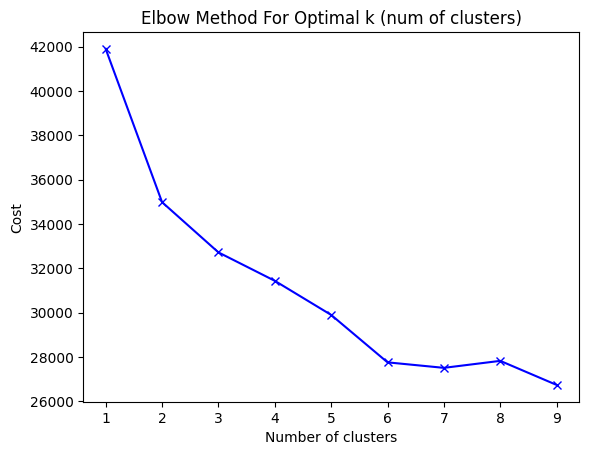

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

vehicleDfClusterOriginal = vehicleDf_cleaned.copy()[['V_TYPE', 'V_MNVR', 'V_YEAR']]
for col in vehicleDfClusterOriginal.columns:
  vehicleDfClusterOriginal[col] = vehicleDfClusterOriginal[col].apply(str)

cost = []
K = range(1, 10)
for num_clusters in K:
    kmode = KModes(n_clusters=num_clusters, init='random', n_init=5, verbose=0)
    kmode.fit_predict(vehicleDfClusterOriginal)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (num of clusters)')
plt.show()

We then fit the model using the Kmodes library, with 2 clusters.

In [ ]:
kmodes = KModes(n_clusters= 2, init='random', n_init=5, verbose=0)
clusters = kmodes.fit_predict(vehicleDfClusterOriginal)

As we model a significant number of data points - it is challenging to investigate manually if those clusters signify an intepretable pattern. So we wil create a one hot encoding of my categories so we can then apply t-SNE to it to help us visualize the data. We will plot this through multiple perplexities, this is to make sure we conduct t-SNE appropriately and don't make any misleading conclusions, as a larger set of plots of perplexities reveals a larger and more cohesive image.

In [ ]:
clusterDf = vehicleDfClusterOriginal.copy()
clusterDf['Cluster'] = clusters
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( sparse_output=False)
dfEncoded = encoder.fit_transform(vehicleDfClusterOriginal)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarnin

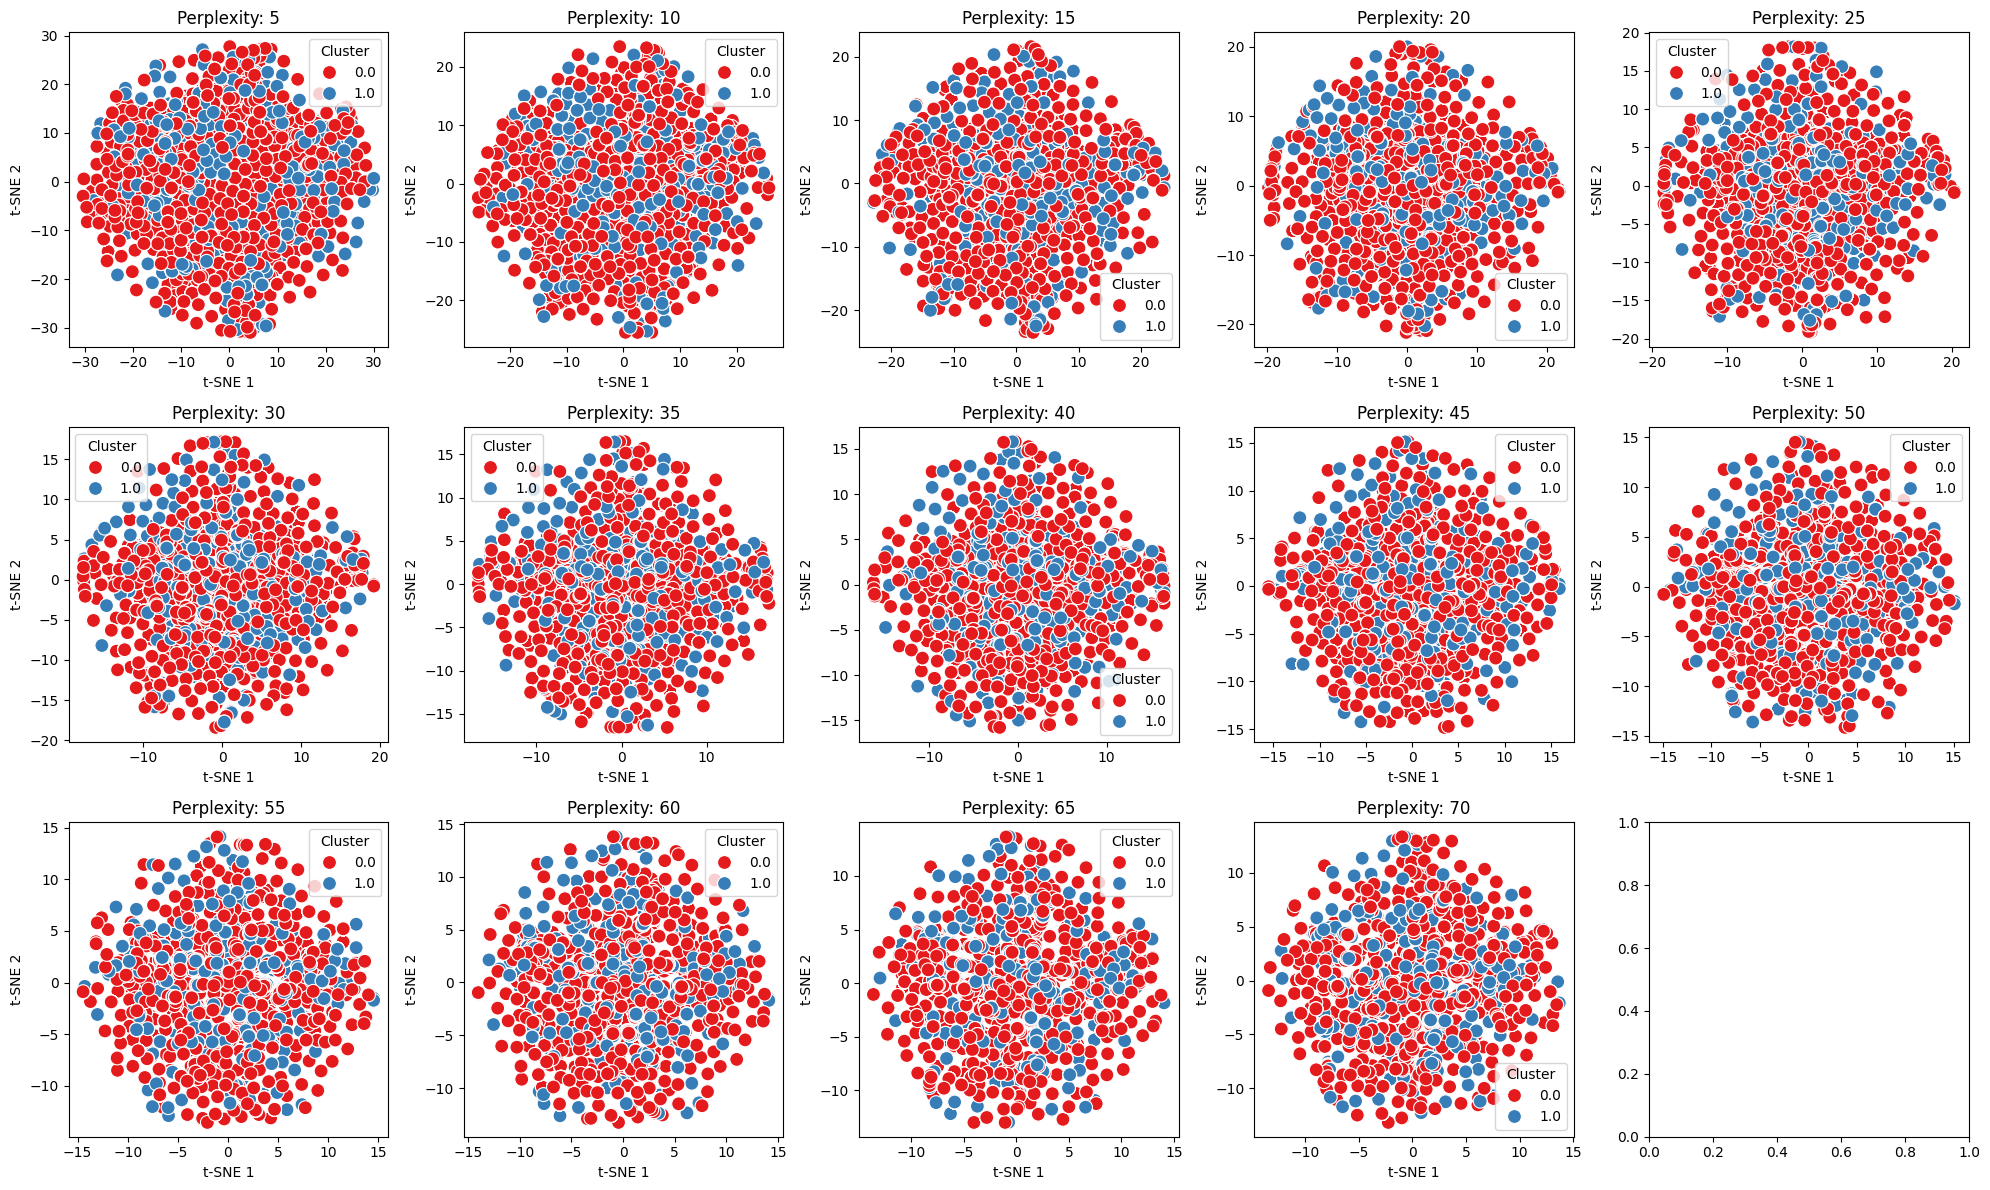

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

perplexities = range(5, 75, 5)
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300)
    tsne_res = tsne.fit_transform(dfEncoded)

    tsne_df = pd.DataFrame(tsne_res, columns=['t-SNE 1', 't-SNE 2'])
    tsne_df['Cluster'] = clusterDf['Cluster']

    sns.scatterplot(
        x="t-SNE 1", y="t-SNE 2",
        palette='Set1',
        hue='Cluster',
        s=100,
        data=tsne_df,
        ax=axes[i]  # Plot on the respective axis
    )

    axes[i].set_title(f'Perplexity: {perplexity}')

plt.tight_layout()
plt.show()

The plots reveal that even through multiple perplexities, no clear patttern for the different clusters emerges. This suggests that we likely do not actually have any specific clusters of collisions based off their vehicle type, their maneuver and their licence year. Suggesting that these variables likely are independant of each other.

### 3.1.8 Concluding Analysis for Question 1

My analysis reveals that most collisions (~94%) involve vehicles licensed in the Northwest Territories (NWT), with Alberta vehicles accounting for ~3%. This suggests focusing on local driver education while investigating why Albertan vehicles are overrepresented in collisions. <br>

Vehicle license year does not appear to significantly impact collision rates. However, ~37% of collisions occurred with headlights on, and ~28% with no lights, indicating potential issues with proper headlight use. <br>

Pickup trucks account for ~36% of collisions, followed by passenger cars (29%) and light utility vehicles (20%). Left-hand turns were almost twice as likely to result in collisions compared to right-hand turns, while ~50% of reversing collisions involved pickup trucks, highlighting areas for further research on vehicle design and driver behavior. <br>

Finally, clustering analysis did not reveal any significant patterns, suggesting that vehicle type, maneuver, and license year are largely independent factors. Overall, the findings point to the need for targeted driver education and vehicle design improvements. <br>








## 3.2 **How do environmental factors and potential road conditions influence the frequency of collisions?**

### 3.2.1  Investigating Collision Severity by Weather Condition

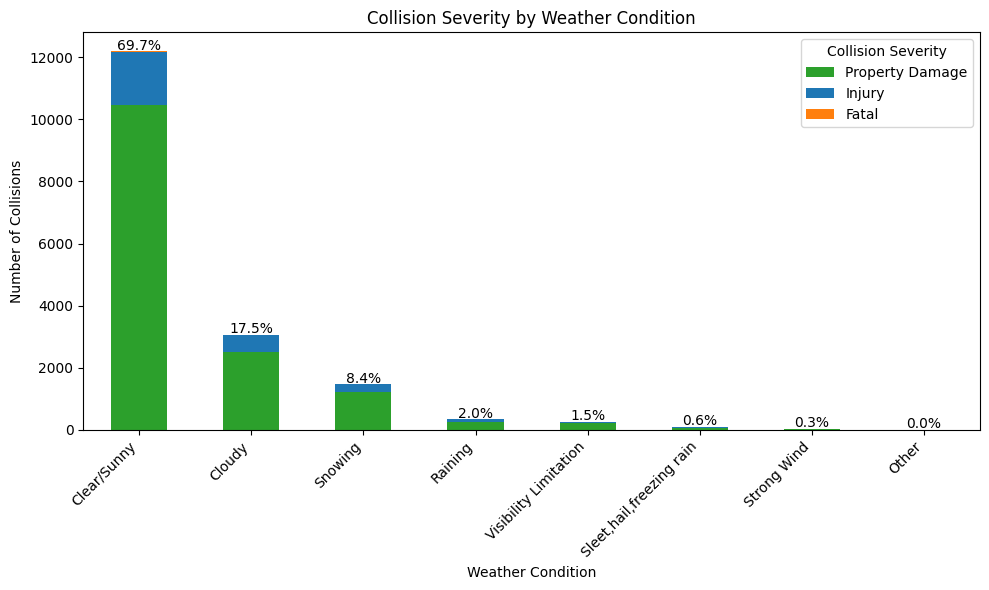

In [ ]:
crosstab = pd.crosstab(df_cleaned['C_WTHR'], df_cleaned['C_SEV'])
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]
order = df_cleaned["C_WTHR"].value_counts().index
severity_order = ['Property Damage','Injury','Fatal']
colors = ['C2', 'C0', 'C1']
crosstab = crosstab[severity_order]
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color = colors)
plt.title('Collision Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Collisions')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, rotation=45, ha='right')
total = crosstab.sum().sum()
for i, col_total in enumerate(crosstab.sum(axis=1)):
    percentage = f'{(col_total / total) * 100:.1f}%'
    ax.text(i, col_total + 50, percentage, ha='center')
ax.legend(title='Collision Severity')
plt.tight_layout()
plt.show()

The graph illustrates both the distribution and severity of traffic collisions across various weather conditions. The data reveals that the majority of collisions (69.7%) occur during clear or sunny weather, followed by 17.5% during cloudy weather, and 8.4% in snowing conditions. Other weather conditions, such as rain, sleet/hail/freezing rain, and visibility limitations, contribute to 2% or less of total collisions, while rare weather events like strong wind account for less than 0.5% of incidents.

Interestingly, while adverse weather conditions such as snow and rain present elevated risks, the vast majority of collisions happen in clear weather. This likely reflects the prevalence of clear weather conditions rather than an increased inherent risk. In terms of severity, most collisions, regardless of weather, result in property damage, with injuries being less common, and fatal outcomes remaining rare.

Even under adverse weather conditions, such as cloudy or snowing conditions, the pattern holds, with property damage being the most frequent result. Fatal collisions are uncommon across all weather types, with the most severe outcomes generally occurring under clear skies. This trend highlights the need for caution in all weather conditions, even when the weather seems favorable. Both the frequency and associated risks of different weather conditions should be considered when analyzing traffic collisions.

### 3.2.2  Investigating Collision Severity by Road Surface Condition

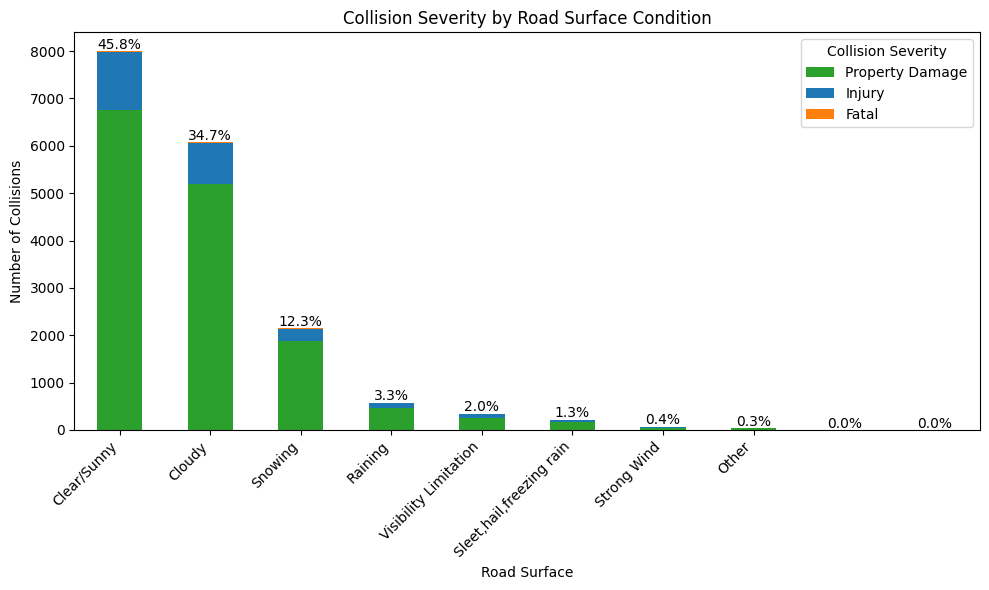

In [ ]:
crosstab = pd.crosstab(df_cleaned['C_RSUR'], df_cleaned['C_SEV'])
severity_order = ['Property Damage','Injury','Fatal']
colors = ['C2', 'C0', 'C1']
crosstab = crosstab[severity_order]
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6),color = colors)
plt.title('Collision Severity by Road Surface Condition')
plt.xlabel('Road Surface')
plt.ylabel('Number of Collisions')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, rotation=45, ha='right')
total = crosstab.sum().sum()
for i, col_total in enumerate(crosstab.sum(axis=1)):
    percentage = f'{(col_total / total) * 100:.1f}%'
    ax.text(i, col_total + 50, percentage, ha='center')
ax.legend(title='Collision Severity')
plt.tight_layout()
plt.show()

The chart displays both the distribution and severity of collisions across various road surface conditions. Clear or sunny road conditions account for the highest number of collisions, representing 45.8% of the total, followed by cloudy road surfaces at 34.7%. Snow-covered roads contribute 12.3%, while wet surfaces account for 3.3% of incidents. Other hazardous conditions, such as visibility limitation, sleet/hail/freezing rain, and strong winds, represent a smaller portion of collisions, with categories like "Other" being negligible.

In terms of severity, clear/sunny conditions are associated with the highest number of collisions, with property damage being the most common outcome, though a smaller proportion of these incidents result in injury. Cloudy conditions, while slightly less frequent than clear ones, show a similar pattern, with a higher proportion of injury-related incidents compared to other conditions. Snowy conditions also contribute to a moderate number of collisions, with most resulting in property damage and only a small number leading to injury or fatality. Other surface types, including wet and icy conditions, account for fewer collisions overall, but the majority of these incidents result in property damage.

This distribution suggests that while clear weather and road conditions contribute to the highest number of incidents, likely due to the frequency of these conditions, they still require extra caution to prevent collisions. Snowy and rainy conditions pose additional risks but occur less frequently, leading to fewer overall collisions.

## 3.2.3 Investigating Collision Severity by Light Condition

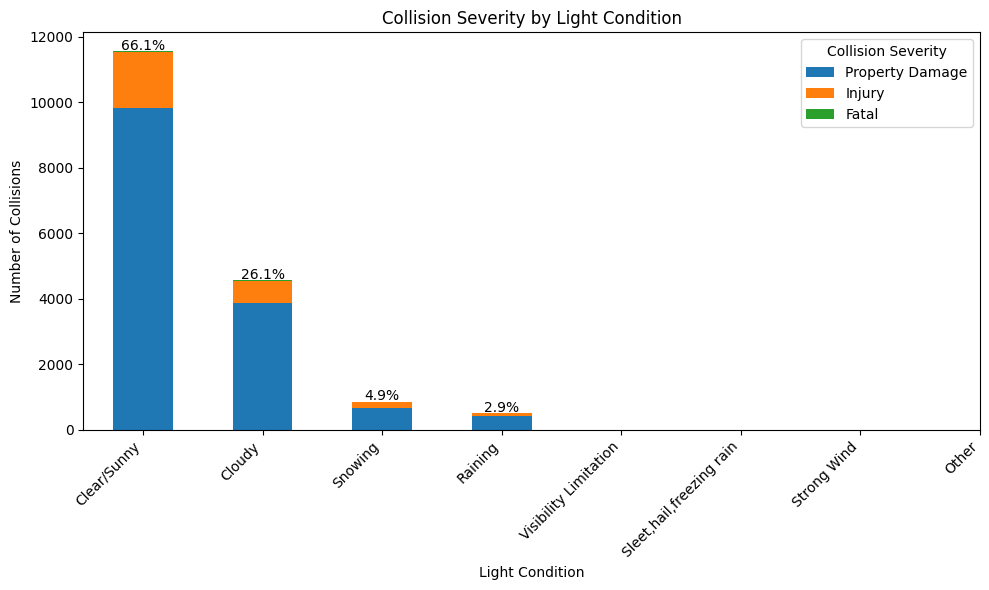

In [ ]:
crosstab = pd.crosstab(df_cleaned['C_LITE'], df_cleaned['C_SEV'])
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]
severity_order = ['Property Damage','Injury','Fatal']
colors = ['C2', 'C0', 'C1']
crosstab = crosstab[severity_order]
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Collision Severity by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Collisions')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, rotation=45, ha='right')
total = crosstab.sum().sum()
for i, col_total in enumerate(crosstab.sum(axis=1)):
    percentage = f'{(col_total / total) * 100:.1f}%'
    ax.text(i, col_total + 50, percentage, ha='center')
ax.legend(title='Collision Severity')
plt.tight_layout()
plt.show()

The graph highlights both the distribution and severity of collisions under different light conditions. A significant majority of collisions (66.1%) occur during daylight, with most resulting in property damage, followed by a smaller proportion of injuries and minimal fatalities. Darkness accounts for the second-highest proportion of collisions at 26.1%, with a higher incidence of injuries and fatalities compared to daylight, suggesting that reduced visibility at night poses a greater risk of severe outcomes. Dusk and dawn conditions result in relatively fewer collisions, contributing 4.9% and 2.9% of total incidents, respectively, with most collisions leading to property damage and few resulting in injuries or fatalities.

These findings suggest that while daylight conditions see the highest number of collisions, likely due to higher traffic volume, low-light conditions such as darkness, dusk, and dawn present a greater risk for more severe outcomes, particularly in terms of injuries and fatalities. This highlights the need for heightened caution during low-visibility periods.






### 3.2.4 Heatmaps - Exploring the interaction between Conditions  

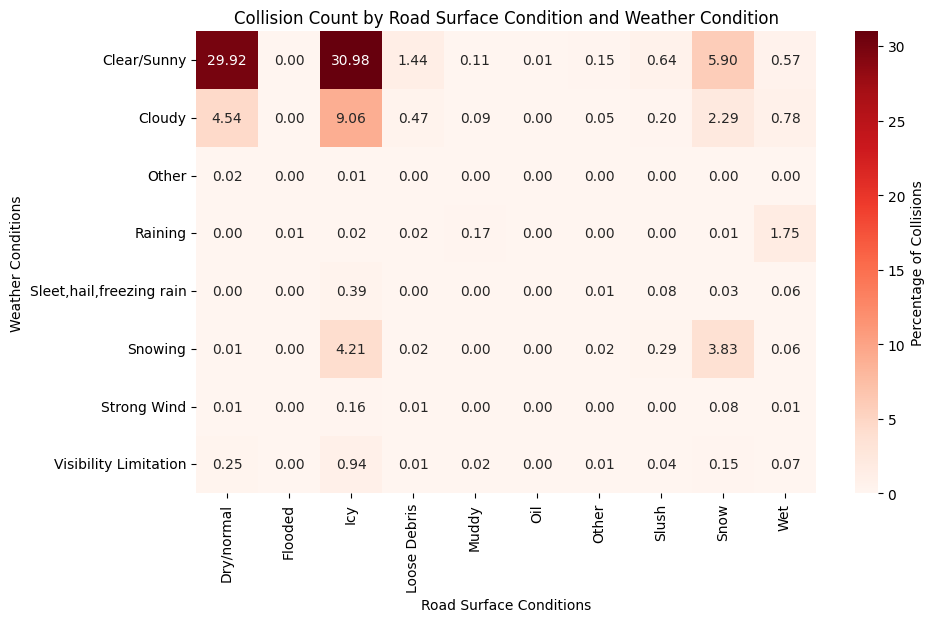

In [ ]:
road_weather_crosstab = pd.crosstab(df_cleaned['C_WTHR'], df_cleaned['C_RSUR'], normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.heatmap(road_weather_crosstab, annot=True, cmap='Reds', fmt='.2f', cbar_kws={'label': 'Percentage of Collisions'})
plt.title('Collision Count by Road Surface Condition and Weather Condition')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Weather Conditions')
plt.show()

This heatmap presents the distribution of collisions by road surface and weather conditions. The majority of collisions occur on dry or normal road surfaces under clear or sunny weather conditions, making up the highest percentage of total collisions (29.87% for clear weather on dry roads). Cloudy weather also shows a notable percentage of collisions, particularly on dry surfaces (9.06%). Icy road surfaces contribute significantly to collisions across various weather conditions, especially in cloudy and snowy weather (4.19% in snow). Snow-covered roads see elevated collision rates during snowy weather (3.89%). Interestingly, wet road surfaces, while present, exhibit fewer collisions in most weather categories. The heatmap clearly shows that clear weather and dry road surfaces present the highest likelihood of collisions, but hazardous conditions such as icy roads and snow are associated with a higher percentage of collisions during inclement weather.

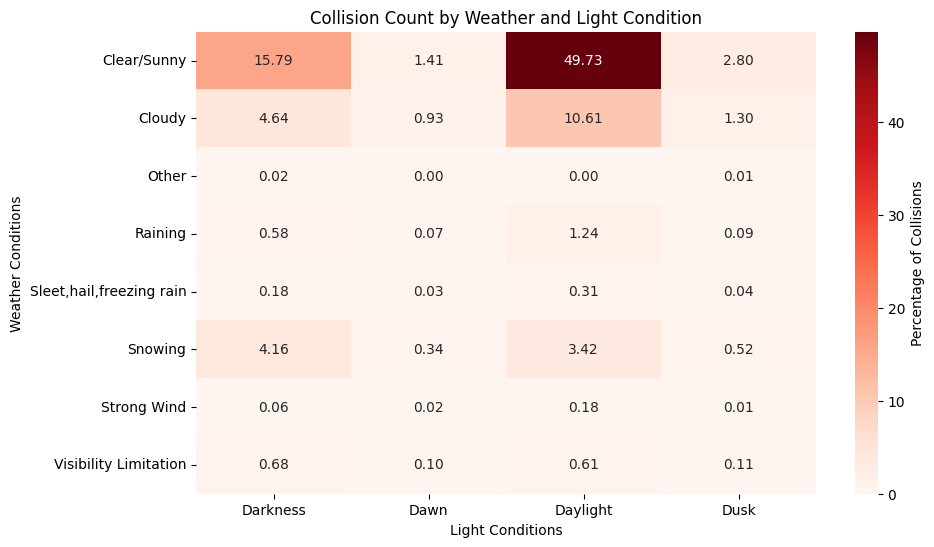

In [ ]:
weather_light_crosstab = pd.crosstab(df_cleaned['C_WTHR'], df_cleaned['C_LITE'], normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.heatmap(weather_light_crosstab, annot=True, cmap='Reds', fmt='.2f', cbar_kws={'label': 'Percentage of Collisions'})
plt.title('Collision Count by Weather and Light Condition')
plt.xlabel('Light Conditions')
plt.ylabel('Weather Conditions')
plt.show()

This heatmap illustrates the percentage distribution of collisions by weather and light conditions. Collisions are predominantly concentrated during clear and sunny conditions, especially in daylight (49.69%), followed by clear weather at night (15.76%). Cloudy weather under daylight conditions also shows a significant number of collisions (10.63%). Comparatively, collisions in other weather conditions such as snow, rain, and sleet are much lower across all light conditions, with snow under darkness having the most considerable impact (4.21%). The influence of light conditions is evident, as daylight consistently presents higher collision percentages across most weather conditions compared to dawn, dusk, or darkness. This pattern suggests that while daylight provides better visibility, it may also coincide with higher traffic volumes, contributing to the greater number of collisions.








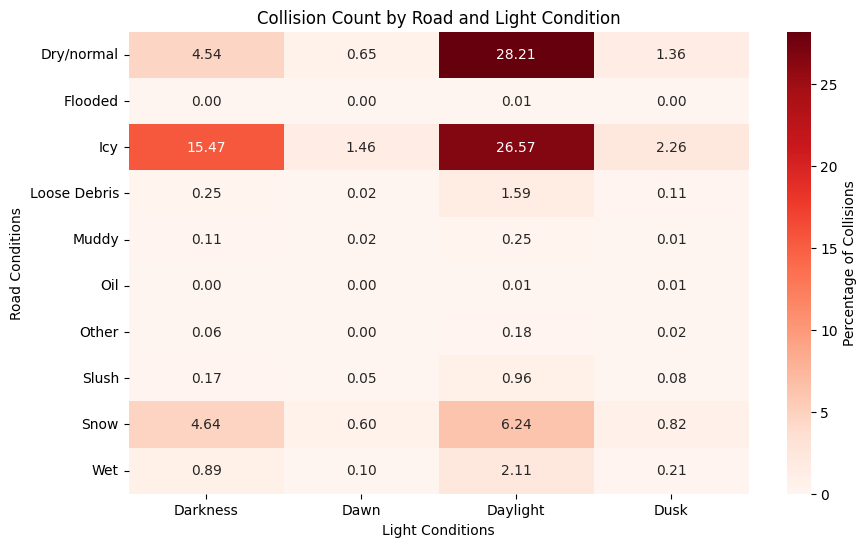

In [ ]:
road_light_crosstab = pd.crosstab(df_cleaned['C_RSUR'], df_cleaned['C_LITE'], normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.heatmap(road_light_crosstab, annot=True, cmap='Reds', fmt='.2f', cbar_kws={'label': 'Percentage of Collisions'})
plt.title('Collision Count by Road and Light Condition')
plt.xlabel('Light Conditions')
plt.ylabel('Road Conditions')
plt.show()

This heatmap visualizes the collision distribution based on road conditions and light conditions. The highest collision percentages occur under dry/normal and icy road conditions, particularly during daylight. Specifically, 28.19% of collisions occurred on dry/normal roads in daylight, while 26.53% occurred on icy roads during the same period. A significant portion of collisions also occurs on icy roads at night (15.46%). In contrast, collisions on other road surfaces, such as slush, snow, or wet conditions, are considerably lower, with snow in daylight showing a slightly higher percentage (6.26%). This heatmap highlights the heightened risk of collisions on icy roads, particularly under both daylight and darkness, suggesting that icy conditions consistently present a danger regardless of lighting.

### 3.2.5 Modelling Accident Count



In [ ]:
accident_counts = df_cleaned.groupby(['C_WTHR', 'C_RSUR', 'C_SEV', 'C_LITE']).size().reset_index(name='Accident_Count')
accident_counts.head()

<ipython-input-31-43451fb07e87>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts = df_cleaned.groupby(['C_WTHR', 'C_RSUR', 'C_SEV', 'C_LITE']).size().reset_index(name='Accident_Count')


,C_WTHR,C_RSUR,C_SEV,C_LITE,Accident_Count
0,Clear/Sunny,Dry/normal,Fatal,Darkness,1
1,Clear/Sunny,Dry/normal,Fatal,Dawn,0
2,Clear/Sunny,Dry/normal,Fatal,Daylight,4
3,Clear/Sunny,Dry/normal,Fatal,Dusk,0
4,Clear/Sunny,Dry/normal,Injury,Darkness,87


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
poisson_model = smf.poisson('Accident_Count ~ C(C_WTHR) + C(C_RSUR) + C(C_LITE)', data=accident_counts).fit()
print(poisson_model.summary())

Optimization terminated successfully.
         Current function value: 16.506911
         Iterations 15
                          Poisson Regression Results                          
Dep. Variable:         Accident_Count   No. Observations:                  960
Model:                        Poisson   Df Residuals:                      940
Method:                           MLE   Df Model:                           19
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.7468
Time:                        23:38:05   Log-Likelihood:                -15847.
converged:                       True   LL-Null:                       -62581.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 5.9098    


We decided to start out with a Poisson regression model with the dependent variable being the "Accident Count" and several independent categorical variables such as weather conditions (C_WTHR), road surface conditions (C_RSUR), and light conditions (C_LITE). The purpose here is to explore the potential applicability of different regression models to the data and to understand which conditions might be most strongly associated with accident counts. The Poisson model is a standard approach for count data, and we are comparing its fit and coefficients against other models like the Negative Binomial model.

In [ ]:
mean_resid = poisson_model.resid_response.mean()
var_resid = poisson_model.resid_response.var()

print(f"Mean of Residuals: {mean_resid}")
print(f"Variance of Residuals: {var_resid}")

# Check for overdispersion
if var_resid > mean_resid:
    print("Overdispersion detected! Consider using Negative Binomial regression.")
else:
    print("No overdispersion detected.")

Mean of Residuals: -1.7074304932881053e-15
Variance of Residuals: 17285.681336614678
Overdispersion detected! Consider using Negative Binomial regression.


The residuals indicate the presence of overdispersion in the model. In this case, the variance of the residuals (17,440.28) is significantly larger than the mean (effectively 0). Overdispersion occurs when the variability in the data is greater than what is assumed by the Poisson distribution, which expects the mean and variance to be roughly equal.

Due to the overdispersion, it is recommended to consider using Negative Binomial regression instead of Poisson regression. The Negative Binomial model accounts for overdispersion by introducing an extra parameter to model the variance separately, making it more suitable for datasets where the variance exceeds the mean, such as this one.

In [ ]:
neg_binom_model = smf.negativebinomial('Accident_Count ~ C(C_WTHR) + C(C_RSUR) + C(C_LITE)', data=accident_counts).fit(method='newton')
print(neg_binom_model.summary())

Optimization terminated successfully.
         Current function value: 1.251419
         Iterations 15
                     NegativeBinomial Regression Results                      
Dep. Variable:         Accident_Count   No. Observations:                  960
Model:               NegativeBinomial   Df Residuals:                      940
Method:                           MLE   Df Model:                           19
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.1807
Time:                        23:38:06   Log-Likelihood:                -1201.4
converged:                       True   LL-Null:                       -1466.3
Covariance Type:            nonrobust   LLR p-value:                2.860e-100
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 4.8479     

We switched to a Negative Bionomial regression model for accident counts using the specified independent variables. The model successfully converged, indicating that the estimates for coefficients are reliable. The coefficients (coef) represent the effect of each category relative to the reference category, with negative values indicating a decrease in the predicted accident count relative to the reference and positive values indicating an increase.

The high z-values and corresponding low p-values (many are 0.000 rounded) indicate strong statistical significance for most of the categories in this model. The alpha parameter is greater than 1, confirming the presence of overdispersion in the data, which further justifies the use of Negative Binomial regression over Poisson regression.


This model provides insight into the impact of different weather conditions, road surface conditions, and light conditions on accident counts, with each category's effect compared to the reference categories for each variable.

In [ ]:
print("\nP-values:")
print(neg_binom_model.pvalues.to_string(float_format='%.40f'))



P-values:
Intercept                               0.0000000000000000000000000000000000000002
C(C_WTHR)[T.Cloudy]                     0.0082191675324046458567250894589051313233
C(C_WTHR)[T.Other]                      0.0000000000000000000000000007302542004297
C(C_WTHR)[T.Raining]                    0.0000025021087363242167602079592259034513
C(C_WTHR)[T.Sleet,hail,freezing rain]   0.0000000000000000003613773852805204228225
C(C_WTHR)[T.Snowing]                    0.0000002102780808363464596637569309009463
C(C_WTHR)[T.Strong Wind]                0.0000000000000000000000000000005481423335
C(C_WTHR)[T.Visibility Limitation]      0.0000000000000013669777906929210043925897
C(C_RSUR)[T.Flooded]                    0.0000000000000582327892257877599454572046
C(C_RSUR)[T.Icy]                        0.0045545812884611467166728893118943233276
C(C_RSUR)[T.Loose Debris]               0.0000000010222205266486759857498019802473
C(C_RSUR)[T.Muddy]                      0.0000000000513616995909309239584696

From the output, the variables with p-values greater than 0.05 (the commonly used significance level) and therefore not statistically significant are:

C(C_RSUR)[T.Wet]: p = 0.4014

C(LITE)[T.Dawn]: p = 0.5717

These variables suggest that the "Wet" road surface condition, as well as the "Dawn" and "Dusk" lighting conditions, may not have a strong influence on the accident counts based on this model.

### 3.2.6 Concluding Analysis for Question 2

Based on the data analysis and the negative binomial model results, several key insights emerge regarding traffic accidents in the Northwest Territories. The analysis of environmental factors, including weather conditions, road surface states, and lighting conditions, clearly shows that these variables significantly influence collision frequencies. For instance, adverse weather conditions such as snow and rain contribute to higher accident rates, which aligns with the expectation that low-visibility and slippery conditions heighten driving risks. Similarly, collisions are more likely to occur during periods of darkness, highlighting the need for better lighting infrastructure and driver awareness during low-visibility hours.

The negative binomial model further reinforces these findings, identifying specific environmental and roadway characteristics as significant contributors to accidents. The coefficients from the model suggest that certain weather conditions, road configurations, and lighting conditions substantially increase the likelihood of accidents. The model’s results allow us to quantify these effects, indicating the areas where targeted interventions, such as improved road maintenance during snowy conditions or enhanced street lighting, could be most effective in reducing accident rates.

In conclusion, this analysis provides a comprehensive understanding of the factors that contribute to traffic accidents in the Northwest Territories. The findings point to the importance of focusing on environmental conditions and roadway characteristics when developing strategies to improve road safety. By addressing the specific factors identified in the model and analysis, policymakers and traffic authorities can implement effective interventions, such as seasonal road maintenance programs and public safety campaigns, to reduce the frequency and severity of collisions.

## 3.3 **How does the condition of the driver(s) at the time of the collision impact the accident?**

To investigate this question we decide to investigate the following driver-level related fields:
1. C_ALC - This field denotes whether alcohol has been involved in a collision or not. We investigated this to determine to what extent does driving under the influence increase the risk of severe outcomes.
2. C_SEV - This field denotes how severe a collision is by the type of outcome occured (fatality, injury, property damage). We investigated this to determine how severe different types of collisions are.
3. C_DEAD - This field denotes how many persons were killed during a collision.
4. C_INJ - This field denotes how many persons were injured during a collision.
5. P_BAC - This field denotes the blood alcohol concentration of the driver at the time of the collision.

### 3.3.1 Investigating Collisions & Alcohol Involvment

<ipython-input-36-73e896542170>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  collisions_alcohol_bar_plot = sns.barplot(x = 'C_ALC',


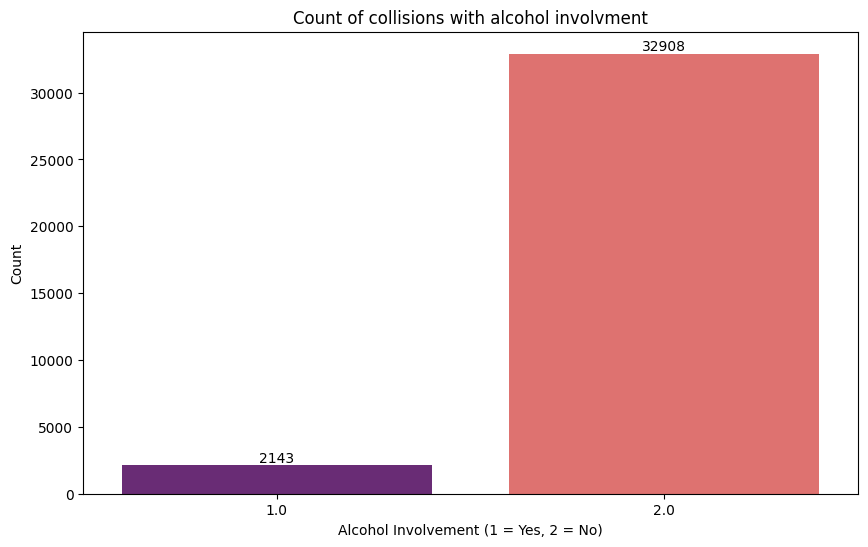

In [ ]:
alc_counts = df['C_ALC'].value_counts().reset_index() # calcualting count totals
alc_counts.columns = ['C_ALC', 'Count']

plt.figure(figsize = (10, 6))  # plotting figure
collisions_alcohol_bar_plot = sns.barplot(x = 'C_ALC',
                       y = 'Count',
                       data = alc_counts,
                       palette = 'magma')
plt.title('Count of collisions with alcohol involvment')
plt.xlabel('Alcohol Involvement (1 = Yes, 2 = No)')
plt.ylabel('Count')

for value_count in collisions_alcohol_bar_plot.patches: # Adding count labels to each bar
    collisions_alcohol_bar_plot.annotate(f'{int(value_count.get_height())}',  # label value
                      (value_count.get_x() + value_count.get_width() / 2, value_count.get_height()),  # location on plot
                      ha = 'center', # horizontal and vertical alignment
                      va = 'bottom')

plt.show()

This visual demonstrates the count of collisions and whether Alcohol was involved or not. Here, we can see that only 2,143 of the 35,051 collisions tracked were recorded as collisions where at least one of the drivers was under the influence of alcohol. While a proportionally small number of accidents, further analysis is conducted to determine if they are more severe with a greater likelihood of negative outcomes.

### 3.3.2 Investigating Collisions & Alcohol Involvment by Severity

<ipython-input-37-b4a564e9efd2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  collisions_alcohol__severity_bar_plot = sns.barplot(x = 'C_SEV',
<ipython-input-37-b4a564e9efd2>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  collisions_alcohol__severity_bar_plot = sns.barplot(x = 'C_SEV',


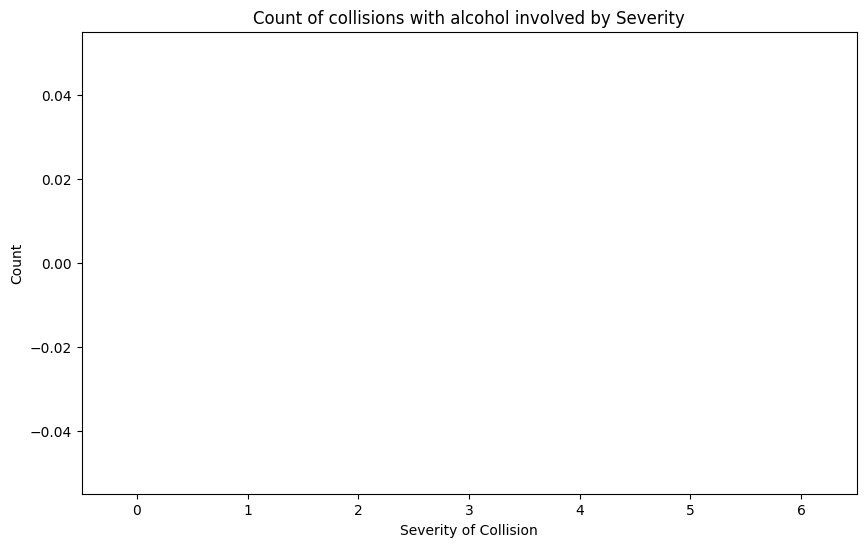

In [ ]:
alcohol_involved = df[df['C_ALC'] == 1.0] # filter for collisions with alcohol involvement
alcohol_involved = alcohol_involved.dropna(subset = ['C_SEV']) # removing NaN values
severity_count = alcohol_involved.groupby('C_SEV').size().reset_index(name = 'count') # counting the collisions by each severity outcome

severity_names = {1.0: 'Fatal', 2.0: 'Injury', 3.0: 'Property Damage'} # adjusting the names of the variables
severity_count['C_SEV'] = severity_count['C_SEV'].map(severity_names) # mapping the names to the dataframe

plt.figure(figsize = (10, 6)) # plotting figure
collisions_alcohol__severity_bar_plot = sns.barplot(x = 'C_SEV',
                       y = 'count',
                       data = severity_count,
                       palette = 'magma')
plt.title('Count of collisions with alcohol involved by Severity')
plt.xlabel('Severity of Collision')
plt.ylabel('Count')

for value_count in collisions_alcohol__severity_bar_plot.patches: # Adding count labels to each bar
    collisions_alcohol__severity_bar_plot.annotate(f'{int(value_count.get_height())}',  # label value
                      (value_count.get_x() + value_count.get_width() / 2, value_count.get_height()),  # location on plot
                      ha = 'center', # horizontal and vertical alignment
                      va = 'bottom')

plt.show()

Isolating the 2,143 collisions where alcohol was tracked by at least one of the drivers, we can further break this down into the severity of the collision. While these counts of the number of Fatal, Injury-causing, and property-damage-causing collisions are relevant, without context, they do not communicate much substance. Further analysis is required to identify how impactful the driver's condition is in terms of the severity of outcomes.

### 3.3.3 Investigating Collisions & Alcohol Involvment by Persons Killed & Injured

<ipython-input-38-604b3f138b4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  collisions_alcohol_fatality_bar_plot = sns.barplot(x = 'C_DEAD',


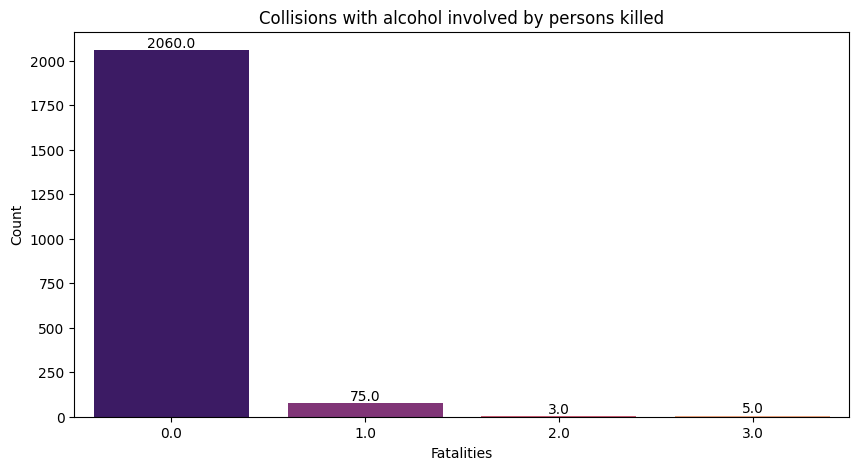

In [ ]:
alc_dead_count = alcohol_involved.groupby('C_DEAD').size().reset_index(name = 'count') # counting the number of persons kills

plt.figure(figsize = (10, 5))
collisions_alcohol_fatality_bar_plot = sns.barplot(x = 'C_DEAD',
                       y = 'count',
                       data = alc_dead_count,
                       palette = 'magma')
plt.title('Collisions with alcohol involved by persons killed')
plt.xlabel('Fatalities')
plt.ylabel('Count')

for index, row in alc_dead_count.iterrows(): # Adding count labels to each bar
    collisions_alcohol_fatality_bar_plot.text(row['C_DEAD'], row['count'], row['count'],
                  color = 'black',
                  ha = "center",
                  va = "bottom")

plt.show()

Here, we are isolating the fatalities that occurred within the 2,143 alcohol-involved collisions.

<ipython-input-39-85e6f35f4f14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  collisions_alcohol_inj_bar_plot = sns.barplot(x = 'C_INJ',


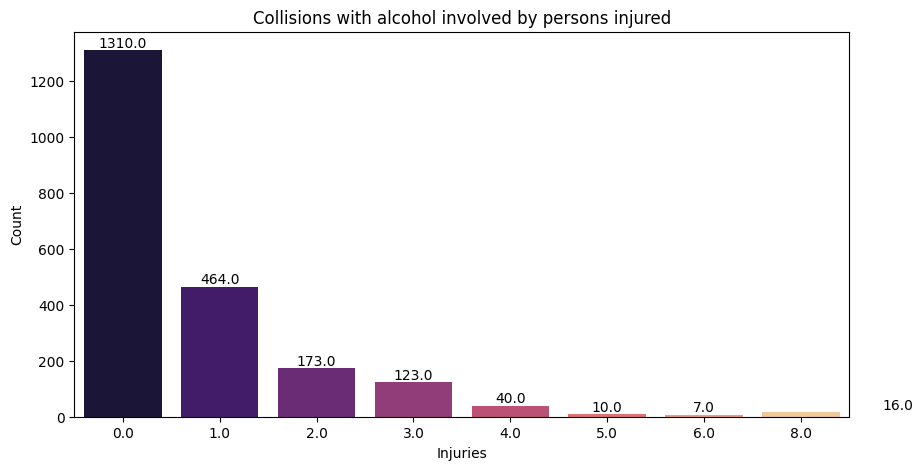

In [ ]:
alc_inj_count = alcohol_involved.groupby('C_INJ').size().reset_index(name = 'count') # counting the number of persons injured

plt.figure(figsize = (10, 5))
collisions_alcohol_inj_bar_plot = sns.barplot(x = 'C_INJ',
                       y = 'count',
                       data = alc_inj_count,
                       palette = 'magma')
plt.title('Collisions with alcohol involved by persons injured')
plt.xlabel('Injuries')
plt.ylabel('Count')

for index, row in alc_inj_count.iterrows(): # Adding count labels to each bar
    collisions_alcohol_inj_bar_plot.text(row['C_INJ'], row['count'], row['count'],
                  color = 'black',
                  ha = "center",
                  va = "bottom")

plt.show()

Here, we are isolating the injuries that occurred within the 2,143 alcohol-involved collisions.

### 3.3.4 Investigating Fatality/Injury Rate & Alcohol Involvment

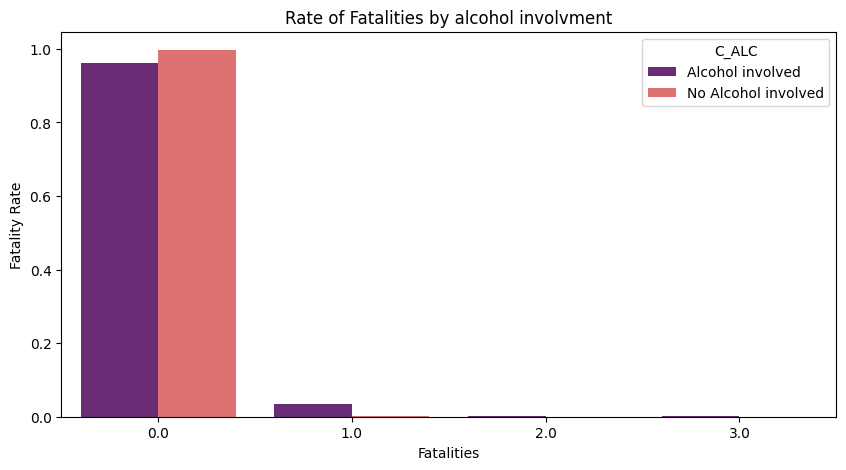

In [ ]:
alc_fatality_data = df[['C_DEAD', 'C_ALC']] # isolating the necesary data
total_collisions = alc_fatality_data.groupby('C_ALC').size().reset_index(name = 'total_count') # counting the total collisions for alcohol involveed and not
fatality_count = alc_fatality_data.groupby(['C_DEAD', 'C_ALC']).size().reset_index(name = 'count') # counting the total collisions for how many fatalities occured
merged_data_fatality = pd.merge(fatality_count, total_collisions, on = 'C_ALC') # merging the two variables to get total counts for both fatal and non fatal accidents
merged_data_fatality['fatality_rate'] = merged_data_fatality['count'] / merged_data_fatality['total_count'] # calculating the fatality rate
alc_mapping_names = {1.0: 'Alcohol involved', 2.0: 'No Alcohol involved'}
merged_data_fatality['C_ALC'] = merged_data_fatality['C_ALC'].map(alc_mapping_names)

plt.figure(figsize = (10, 5))
collisions_alcohol_fatality_rate_bar_plot = sns.barplot(x = 'C_DEAD',
                       y = 'fatality_rate',
                       hue = 'C_ALC',
                       data = merged_data_fatality,
                       palette = 'magma')
plt.title('Rate of Fatalities by alcohol involvment')
plt.xlabel('Fatalities')
plt.ylabel('Fatality Rate')

plt.show()

This visual expands on the previous one by calculating the rate of fatal collisions between both groups of collisions (alcohol and no-alcohol). This visual leads us to believe that fatalities might be more common when alcohol is involved, however, it is difficult to determine given the scaling of the visual as a result of viewing the data by the individual fatality-count occurring per accident.

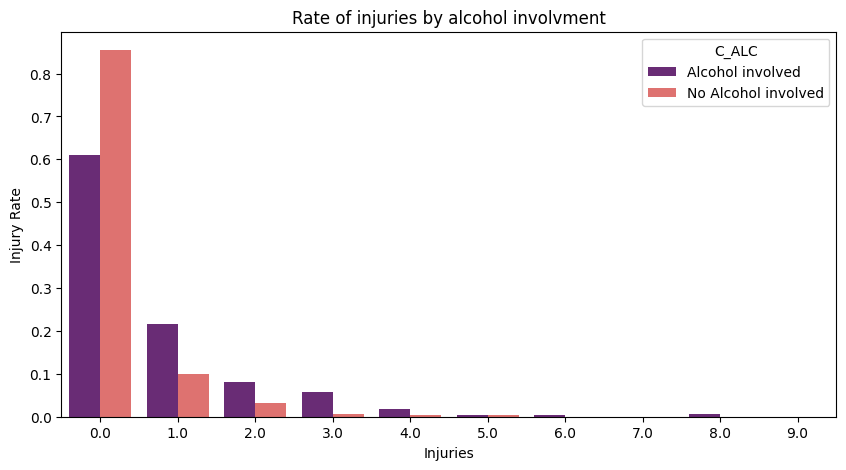

In [ ]:
alc_inj_data = df[['C_INJ', 'C_ALC']] # isolating the necesary data
total_collisions = alc_inj_data.groupby('C_ALC').size().reset_index(name = 'total_count') # counting the total collisions for alcohol involveed and not
inj_count = alc_inj_data.groupby(['C_INJ', 'C_ALC']).size().reset_index(name = 'count') # counting the total collisions for how many injuries occured
merged_data_inj = pd.merge(inj_count, total_collisions, on = 'C_ALC') # merging the two variables to get total counts for both injury-causing and non injury-causing accidents
merged_data_inj['injury_rate'] = merged_data_inj['count'] / merged_data_inj['total_count'] # calculating the fatality rate
alc_mapping_names = {1.0: 'Alcohol involved', 2.0: 'No Alcohol involved'}
merged_data_inj['C_ALC'] = merged_data_inj['C_ALC'].map(alc_mapping_names)

plt.figure(figsize = (10, 5))
collisions_alcohol_inj_rate_bar_plot = sns.barplot(x = 'C_INJ',
                       y = 'injury_rate',
                       hue = 'C_ALC',
                       data = merged_data_inj,
                       palette = 'magma')
plt.title('Rate of injuries by alcohol involvment')
plt.xlabel('Injuries')
plt.ylabel('Injury Rate')

plt.show()

Similar to the previous visual focused on fatalities, this visual calculates the rate of injury-causing collisions between both groups of collisions (alcohol and no-alcohol), by the number of total persons injured by collision. This visual leads us to believe that injuries might be more common when alcohol is involved, however, it is difficult to determine given the scaling of the visual as a result of viewing the data by the individual injury count occurring per accident.

<ipython-input-42-dbe8734d8756>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  collisions_alcohol_fatality_rate_total_bar_plot = sns.barplot(x = ['Alcohol', 'No Alcohol'],


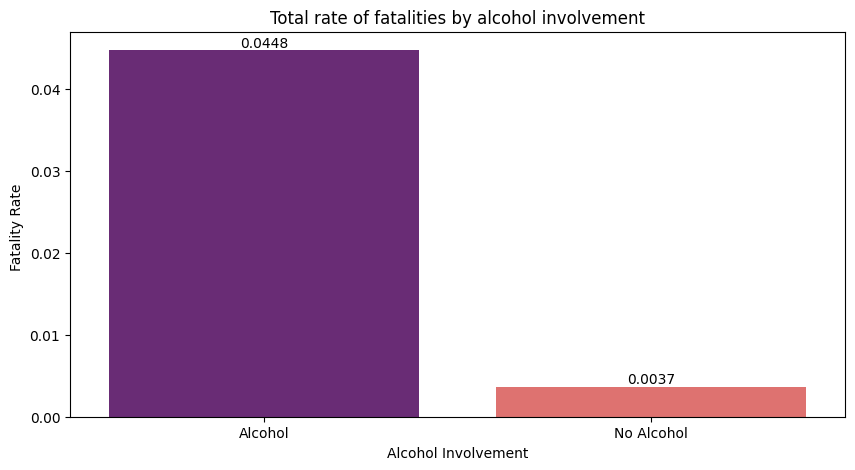

In [ ]:
total_fatality_count = alc_fatality_data.groupby('C_ALC')['C_DEAD'].sum().reset_index(name = 'all_fatalities') # counting the total fatalities
merged_data_fatal_total_fatalities = pd.merge(total_fatality_count, total_collisions, on = 'C_ALC') # merging the two variables to get total fataliteis by collisions
merged_data_fatal_total_fatalities['fatality_rate'] = merged_data_fatal_total_fatalities['all_fatalities'] / merged_data_fatal_total_fatalities['total_count'] #  calculating the fatality rate
merged_data_fatal_total_fatalities['C_ALC'] = merged_data_fatal_total_fatalities['C_ALC'].map(alc_mapping_names)

plt.figure(figsize = (10, 5))
collisions_alcohol_fatality_rate_total_bar_plot = sns.barplot(x = ['Alcohol', 'No Alcohol'],
                       y = 'fatality_rate',
                       data = merged_data_fatal_total_fatalities,
                       palette = 'magma')
plt.title('Total rate of fatalities by alcohol involvement')
plt.xlabel('Alcohol Involvement')
plt.ylabel('Fatality Rate ')

for index, row in merged_data_fatal_total_fatalities.iterrows(): # Adding count labels to each bar
    collisions_alcohol_fatality_rate_total_bar_plot.text(index, row['fatality_rate'], f'{row["fatality_rate"]:.4f}',
                                                         color = 'black',
                                                         ha = "center",
                                                         va = "bottom")

plt.show()

Here, we culminate my previous analysis to identify the total fatality rate between all collisions, separated into those that involved alcohol and those that did not. From this visual, we can see that the fatality rate of collisions involving alcohol is 0.0448, and 0.0037 for those that do not involve alcohol.
This demonstrates that collisions involving alcohol have a 1200% greater likelihood of causing a fatality than those that do not. It is highly likely that drinking and driving increases the fatality rate of collisions.

<ipython-input-43-82f2f13460a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  collisions_alcohol_injury_rate_total_bar_plot = sns.barplot(x = ['Alcohol', 'No Alcohol'],


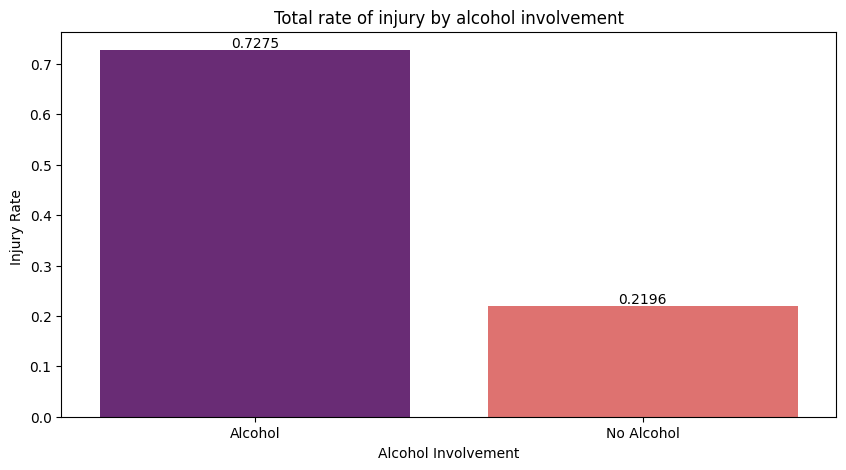

In [ ]:
total_injury_count = alc_inj_data.groupby('C_ALC')['C_INJ'].sum().reset_index(name = 'all_injuries') # counting the total injuries
merged_data_total_injuries = pd.merge(total_injury_count, total_collisions, on = 'C_ALC') # merging the two variables to get total injuries by collisions
merged_data_total_injuries['injury_rate'] = merged_data_total_injuries['all_injuries'] / merged_data_total_injuries['total_count'] #  calculating the fatality rate
merged_data_total_injuries['C_ALC'] = merged_data_total_injuries['C_ALC'].map(alc_mapping_names)

plt.figure(figsize = (10, 5))
collisions_alcohol_injury_rate_total_bar_plot = sns.barplot(x = ['Alcohol', 'No Alcohol'],
                       y = 'injury_rate',
                       data = merged_data_total_injuries,
                       palette = 'magma')
plt.title('Total rate of injury by alcohol involvement')
plt.xlabel('Alcohol Involvement')
plt.ylabel('Injury Rate ')

for index, row in merged_data_total_injuries.iterrows(): # Adding count labels to each bar
    collisions_alcohol_injury_rate_total_bar_plot.text(index, row['injury_rate'], f'{row["injury_rate"]:.4f}',
                                                         color = 'black',
                                                         ha = "center",
                                                         va = "bottom")

plt.show()

Similar to the previous visual focusing on the total fatality rate, here we are culminating the analysis to identify the total injury rate between all collisions, separated into those that involved alcohol and those that did not. From this visual, we can see that the injury rate of collisions involving alcohol is 0.7275, and 0.2196 for those that do not involve alcohol. This demonstrates that collisions involving alcohol have an over 300% greater likelihood of causing an injury than those that do not. It is highly likely that drinking and driving increases the injury rate of collisions.

### 3.3.5 Investigating Fatal collisions with Alcohol Involvment Over Time

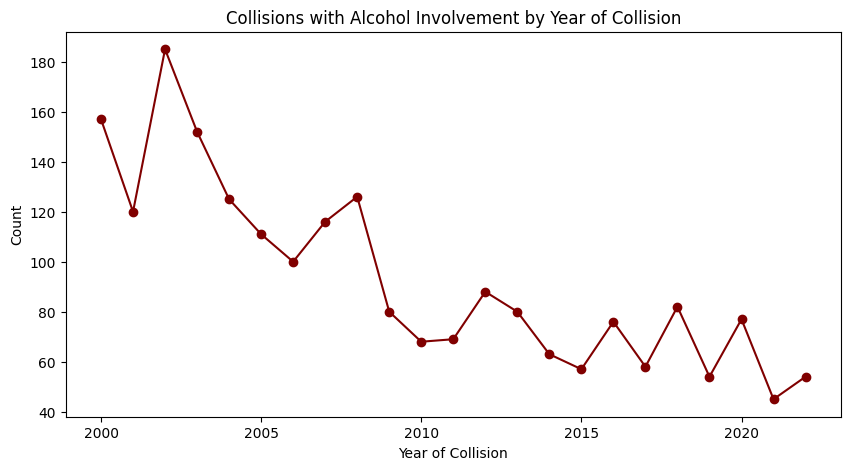

In [ ]:
alc_year_count = alcohol_involved.groupby('C_YEAR').size().reset_index(name='count') # grouping by the year of occurance and counting the number of collisions
alc_year_count = alc_year_count.sort_values(by = 'C_YEAR') # sort in the necessary order

plt.figure(figsize = (10, 5))
collisions_alcohol_year_timeseries = plt.plot(alc_year_count['C_YEAR'], alc_year_count['count'],
                                              marker = 'o',
                                              linestyle = '-',
                                              color = 'maroon')
plt.title('Collisions with Alcohol Involvement by Year of Collision')
plt.xlabel('Year of Collision')
plt.ylabel('Count')
plt.show()

Plotting the count of alcohol-related collisions over the years the data has been tracked, a clear trend can be seen. Collisions involving alcohol have significantly decreased from their high of over 180 in 2002, to a near-low in 2022. The general trend over the years is that these types of collisions are decreasing, and we can therefore assume that the subsequent number of fatalities and injuries resulting from these collisions are decreasing as well.

### 3.3.6 Concluding Analysis for Question 3

How does the condition of the driver(s) at the time of the collision impact the accident?
We will explore how factors such as alcohol use and driver inexperience influence accident outcomes.

From the analysis completed on the driver condition and how it relates

## 3.4 **How do roadway classifications and compositions influence the frequency of collisions?**

To investigate this question we decide to investigate the following fields:

1. C_RCL1 - Indicates whether the road is located in an urban, rural, or other area.

2. C_RCL2 - Describes the functional classification of the road (e.g., arterial, local, collector).

3. C_RCL3 - Specifies the road's geometry, such as multi-lane, single-lane, divided, or undivided.

4. C_LITE - Describes the light conditions on the road at the time of the collision (e.g., daylight, dusk, night).

5. V_LITE - Indicates the status of vehicle headlights at the time of the collision (e.g., headlights, fog lights and so on).

6. C_RCON - Describes the condition of the road (e.g., under repair, potholes, ruts and bumps, in good condition etc) when the accident occurred.

7. C_RMTL - Specifies the material the road was made of (e.g., asphalt, gravel, concrete) at the time of the accident.

8. C_TRAF - Indicates any traffic control measures present at the time of the collision (e.g., traffic signals, stop signs, no light etc).

9. C_SPED - The posted speed limits on the road where the collision occurred.

10. V_SPED - The speed of the vehicle involved in the collision at the time of the accident.

In [ ]:
!pip install plotly
!pip install osmnx folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4
    Uninstalling networkx-3.4:
      Successfully uninstalled networkx-3.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


### 3.4.1 Investigating Road Classifications by Region

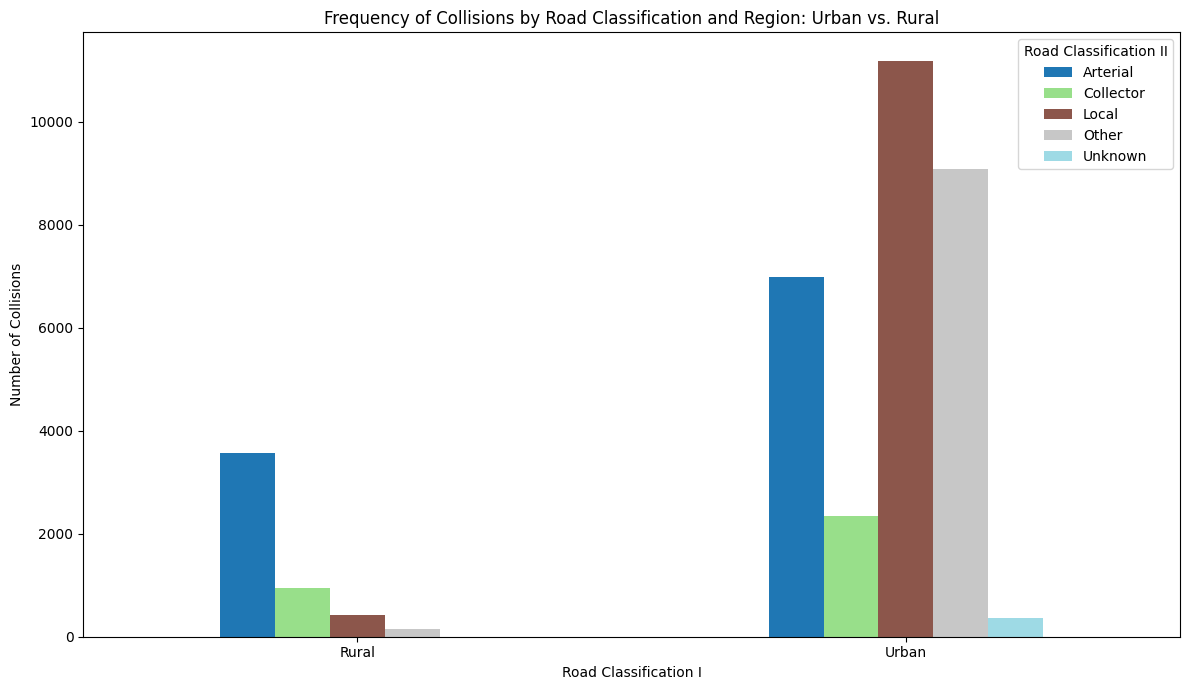

In [ ]:
df_1 = df.copy()
df_1 = df_1[df_1['C_RCL1'].isin(['Urban', 'Rural'])]
road_class_counts = df_1.groupby(['C_RCL1', 'C_RCL2']).size().unstack()


road_class_counts.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='tab20')
plt.title('Frequency of Collisions by Road Classification and Region: Urban vs. Rural')
plt.xlabel('Road Classification I')
plt.ylabel('Number of Collisions')

plt.xticks(rotation=0)
plt.legend(title='Road Classification II')
plt.tight_layout()
plt.show()


We can conclude that:

* Urban areas experience the highest frequency of collisions, particularly on arterial and local roads, as well as in other locations such as parking lots, commercial areas, and private driveways.

* Rural areas experience the highest frequency of collisions, predominantly on arterial roads.

* Given that arterial and local roads can be further subcategorized based on their geometric characteristics, we will we will delve deeper into these classifications to examine the road geometry where the majority of accidents occur.

### 3.4.2 Investigating Road Classifications in Rural Areas

### 3.4.3 Investigating Road Geometry in Rural Areas

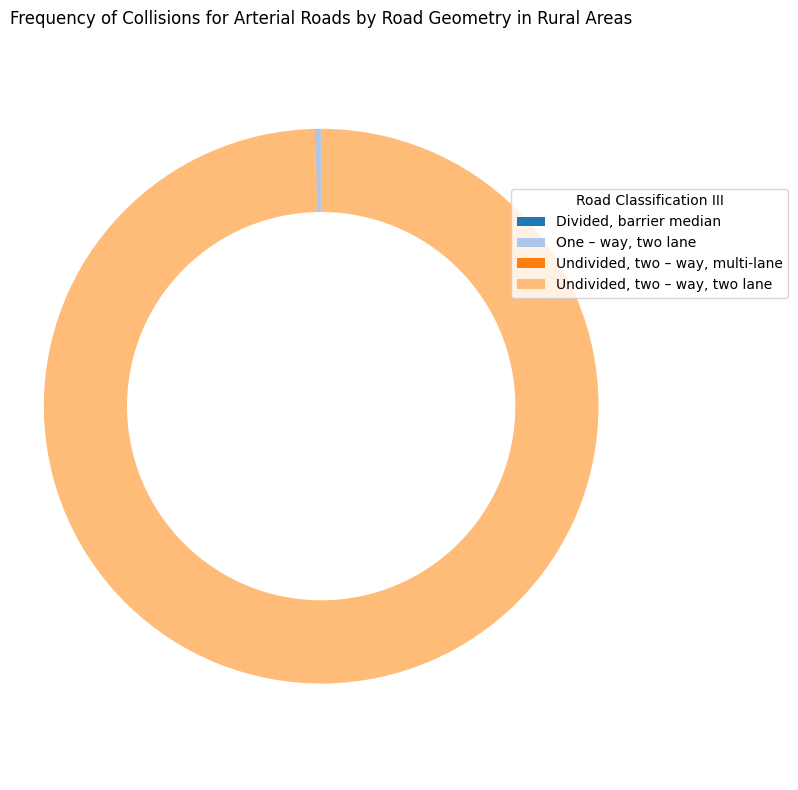

In [ ]:
arterial_rural_df = df[
    (df['C_RCL2'] == 'Arterial') &
    (df['C_RCL1'] == 'Rural')
]

arterial_counts = arterial_rural_df.groupby('C_RCL3').size()

plt.figure(figsize=(8, 8))

wedges, texts = plt.pie(arterial_counts, startangle=90, colors=plt.cm.tab20.colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(wedges, arterial_counts.index, title='Road Classification III', loc='upper left', bbox_to_anchor=(0.8, 0.8))

plt.title('Frequency of Collisions for Arterial Roads by Road Geometry in Rural Areas')
plt.tight_layout()
plt.show()

The most frequent collisions occur on Undivided, two - way, two lane, arterial roads in rural areas.

We can say that undivided two way two lane arterial roads account for the most collisions in rural regions. Now, let's explore the conditions various conditions under which the accidents are most frequently occuring. We are taking into account the following variables for undivided two -way two lane local roads in rural regions:

*  Road Condition
*  Light Condition
*  Posted Speed Limit
*  Traffic Control

### 3.4.4 Investigating Arterial Undivided Two Way Two Lane Roads in Rural regions

In [ ]:
def plot_horizontal_bar(df, column, title, y_label):
    counts = df[column].value_counts().head(5)
    counts.plot(kind='barh', figsize=(10, 6), color='skyblue')
    plt.title(title)
    plt.xlabel('Frequency of Collisions')
    plt.ylabel(y_label)
    plt.grid(axis='x')
    plt.show()

#### Road Condition

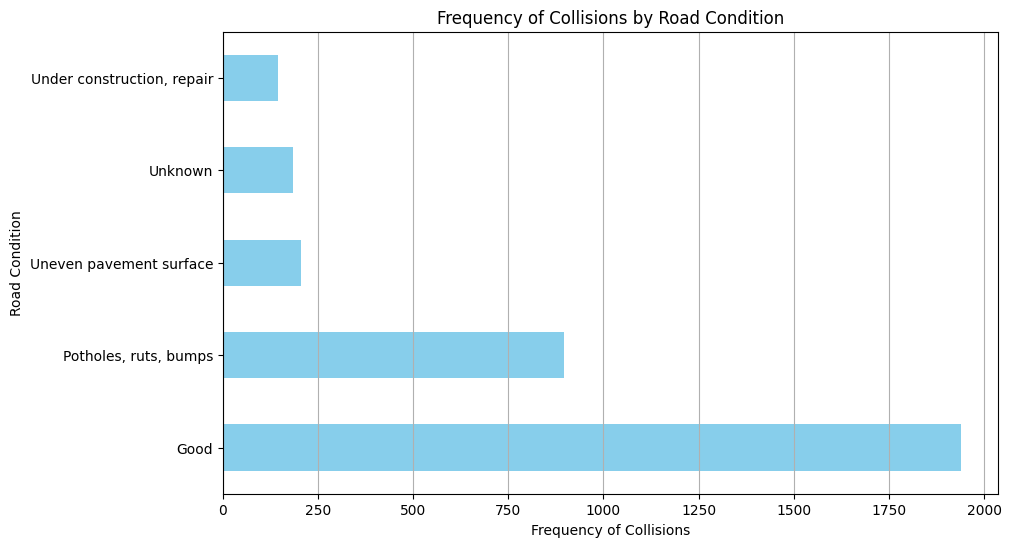

In [ ]:
df_2 = df[
    (df['C_RCL1'] == 'Rural') &
    (df['C_RCL2'] == 'Arterial') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane')
].copy()

#creating bar charts
plot_horizontal_bar(df_2, 'C_RCON', 'Frequency of Collisions by Road Condition','Road Condition')

The majority of collisions on rural arterial roads occur under good road conditions. However, a significant portion of accidents also happens on roads with potholes, ruts, and bumps. Additionally, some collisions occur on uneven pavement surfaces and on roads that are under construction or repair.

We will investigate the road material associated with accidents that occurred on rural arterial roads characterized by potholes, ruts, and bumps.

#### Road Material

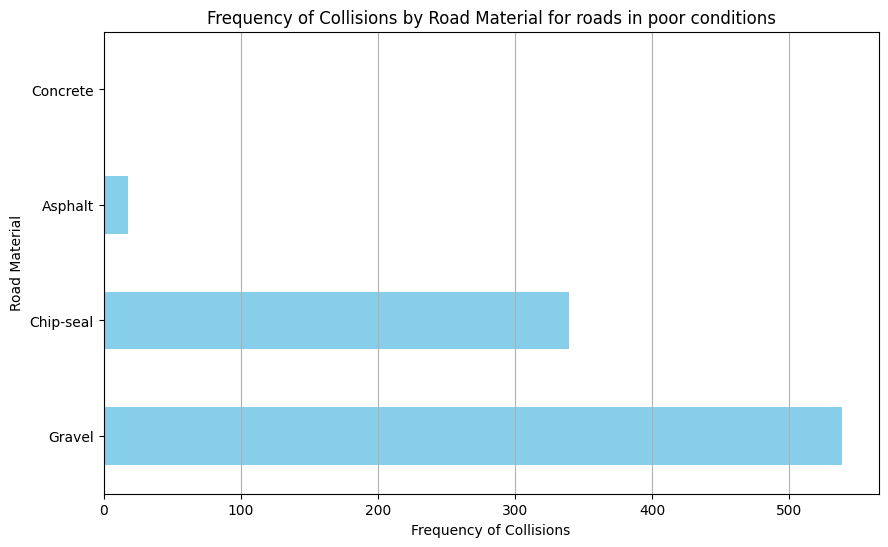

In [ ]:
df_3 = df[
    (df['C_RCL1'] == 'Rural') &
    (df['C_RCL2'] == 'Arterial') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane') &
    (df['C_RCON'] == 'Potholes, ruts, bumps')

].copy()

#creating bar charts
plot_horizontal_bar(df_3, 'C_RMTL', 'Frequency of Collisions by Road Material for roads in poor conditions','Road Material')

Rural arterial roads that exhibit issues such as potholes, ruts, and bumps are primarily constructed from gravel or chip seal materials.

#### Light Condition

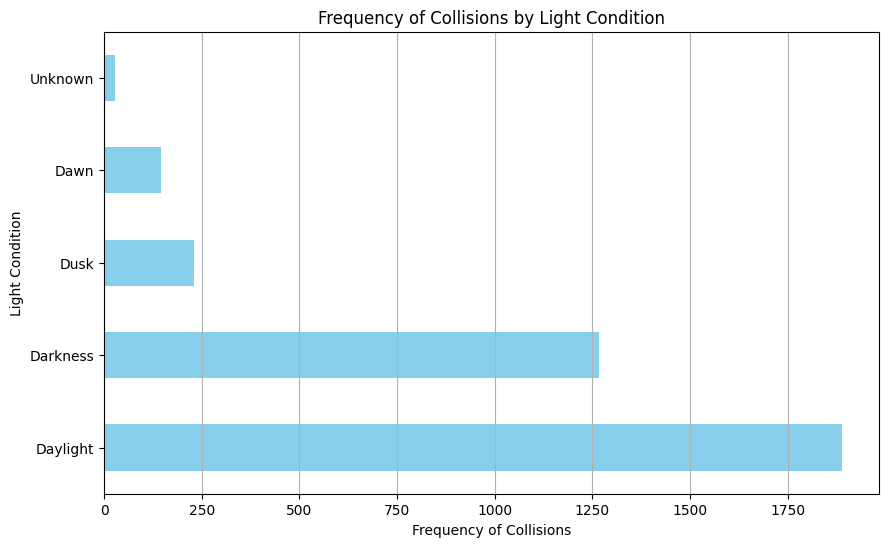

In [ ]:
plot_horizontal_bar(df_2, 'C_LITE', 'Frequency of Collisions by Light Condition','Light Condition')

While the majority of accidents on undivided, two-way, two-lane arterial roads occur during daylight, a significant number also take place in darkness in rural regions.

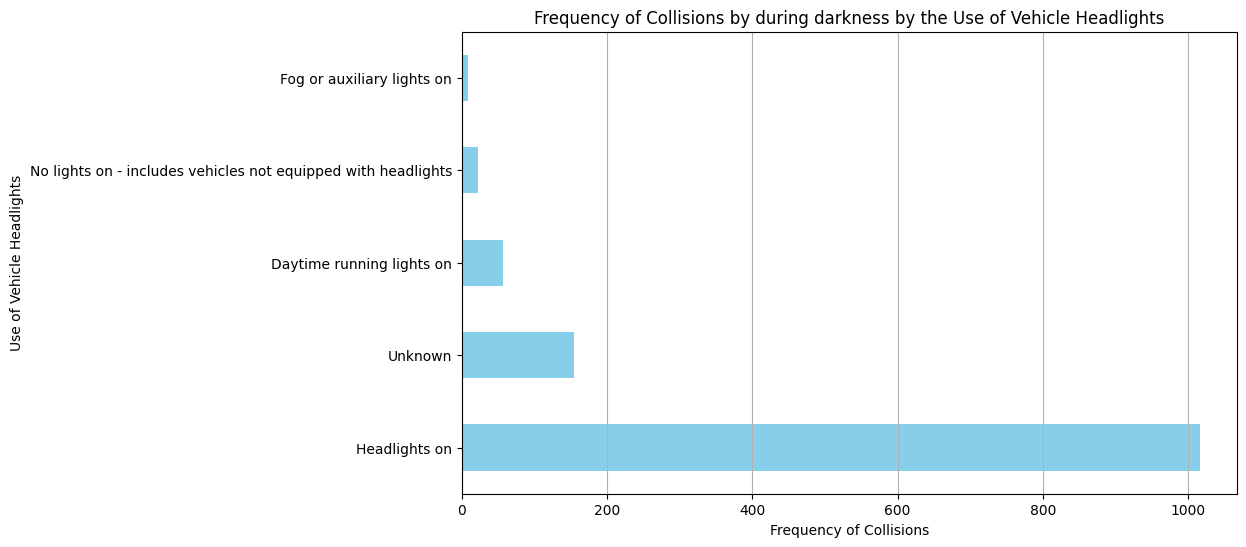

In [ ]:
df_4 = df[
    (df['C_RCL1'] == 'Rural') &
    (df['C_RCL2'] == 'Arterial') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane') &
    (df['C_LITE'] == 'Darkness')

].copy()

#creating bar charts
plot_horizontal_bar(df_4, 'V_LITE', 'Frequency of Collisions by during darkness by the Use of Vehicle Headlights', 'Use of Vehicle Headlights')

#### Posted Speed Limit

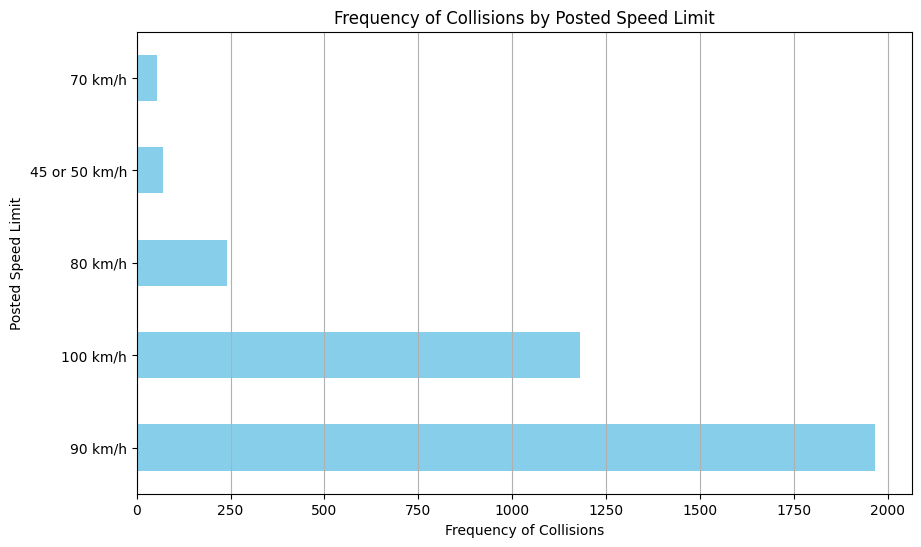

In [ ]:
plot_horizontal_bar(df_2, 'C_SPED', 'Frequency of Collisions by Posted Speed Limit', 'Posted Speed Limit')

The majority of accidents on undivided two-way, two-lane arterial roads in rural areas occur under high posted speed limits, primarily at 90 km/h the most followed by 100 km/h, with some also occurring at an 80 km/h posted speed limit.

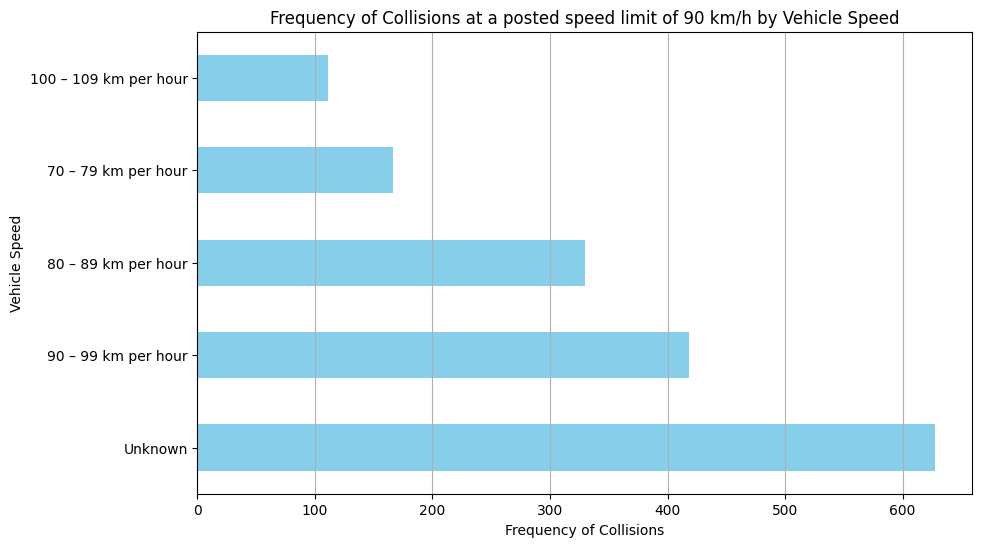

In [ ]:
df_5 = df[
    (df['C_RCL1'] == 'Rural') &
    (df['C_RCL2'] == 'Arterial') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane') &
    (df['C_SPED'] == '90 km/h')

].copy()

#creating bar charts
plot_horizontal_bar(df_5, 'V_SPED', 'Frequency of Collisions at a posted speed limit of 90 km/h by Vehicle Speed', 'Vehicle Speed')

For undivided two-way, two-lane rural arterial roads with a posted speed limit of 90 km/h, the majority of accidents occur at speeds between 90 to 99 km/h and 80 to 89 km/h. A significant portion of accidents also occurs in the 70 to 79 km/h range, with some incidents reported at speeds of 100 to 109 km/h and 60 to 69 km/h.

#### Traffic Control

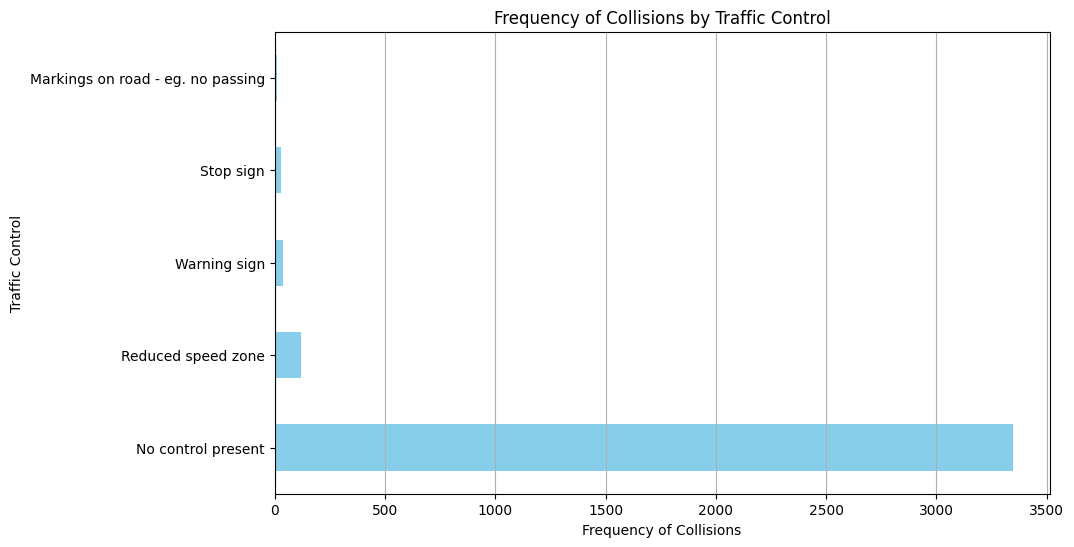

In [ ]:
plot_horizontal_bar(df_2, 'C_TRAF', 'Frequency of Collisions by Traffic Control', 'Traffic Control')

Undivided two-way, two-lane rural arterial roads in rural regions lacked traffic control measures in nearly all collision cases.

The analysis of collision data on undivided, two-way, two-lane arterial roads in rural regions reveals significant insights into the frequency and conditions of accidents. It highlights that while most collisions occur under good road conditions, a notable number are linked to adverse conditions such as potholes, ruts, and bumps, particularly on roads constructed from gravel or chip seal materials. The findings indicate that the majority of accidents take place during daylight, with a substantial portion occurring at night. Most collisions are associated with high posted speed limits, particularly at 90 km/h, and critical incidents frequently occur at speeds between 80 to 99 km/h. Additionally, the analysis points out the lack of traffic control measures at nearly all collision sites, underscoring a gap in safety protocols.

### 3.4.5 Investigating Urban roads in local regions

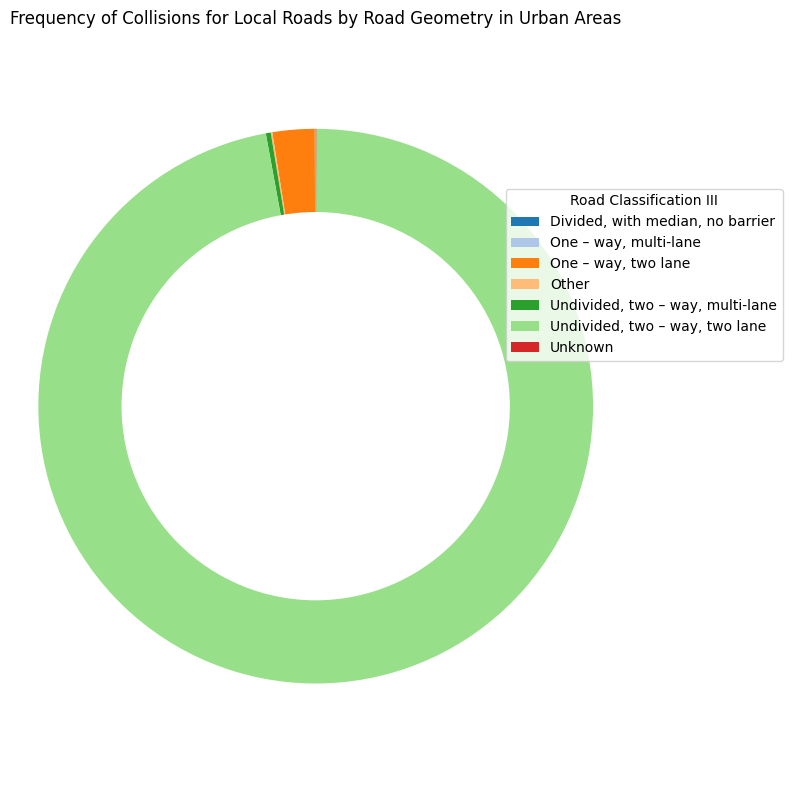

In [ ]:
urban_local_df = df[
    (df['C_RCL2'] == 'Local') &
    (df['C_RCL1'] == 'Urban')
]

local_counts = urban_local_df.groupby('C_RCL3').size()

plt.figure(figsize=(8, 8))

wedges, texts = plt.pie(local_counts, startangle=90, colors=plt.cm.tab20.colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(wedges, local_counts.index, title='Road Classification III', loc='upper left', bbox_to_anchor=(0.8, 0.8))

plt.title('Frequency of Collisions for Local Roads by Road Geometry in Urban Areas')
plt.tight_layout()
plt.show()

We can say that undivided two way two lane local and arterial roads account for the most collisions in urban regions. Now, let's explore the conditions various conditions under which the accidents are most frequently occuring. We are taking into account the following variables for undivided two - way two lane local roads in urban regions:

*  Road Condition
*  Light Condition
*  Posted Speed Limit
*  Traffic Control

### 3.4.6 Investigating Local Unidivided Two Way Two lane roads in Urban regions



#### Road Condition

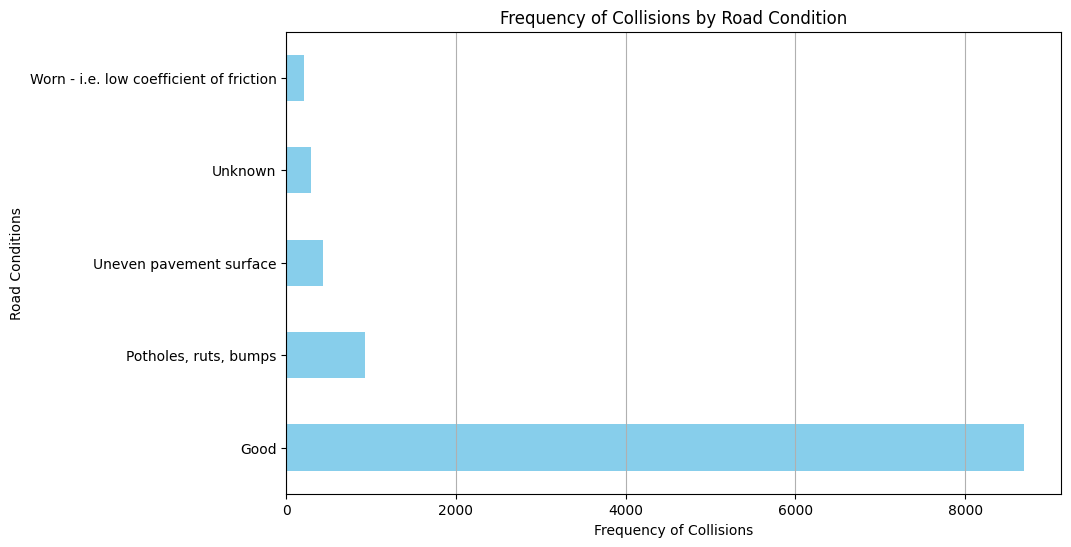

In [ ]:
df_6 = df[
    (df['C_RCL1'] == 'Urban') &
    (df['C_RCL2'] == 'Local') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane')
].copy()

#creating bar charts
plot_horizontal_bar(df_6, 'C_RCON', 'Frequency of Collisions by Road Condition', 'Road Conditions')

The majority of collisions on undivided, two-way, two-lane local roads in urban areas occur under good road conditions, while very few occur on subpar road conditions.

#### Light Condition

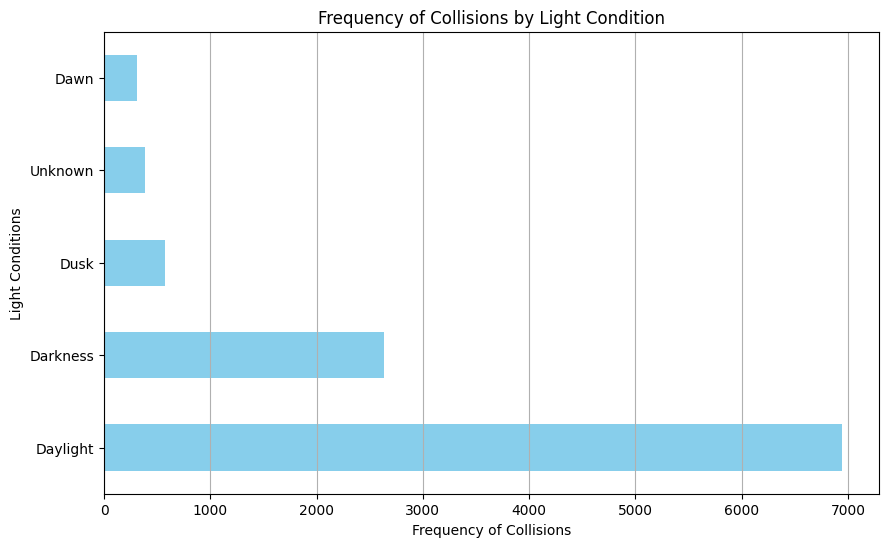

In [ ]:
plot_horizontal_bar(df_6, 'C_LITE', 'Frequency of Collisions by Light Condition','Light Conditions')

While the majority of accidents on undivided, two-way, two-lane local roads occur during daylight, a significant number also take place in darkness.

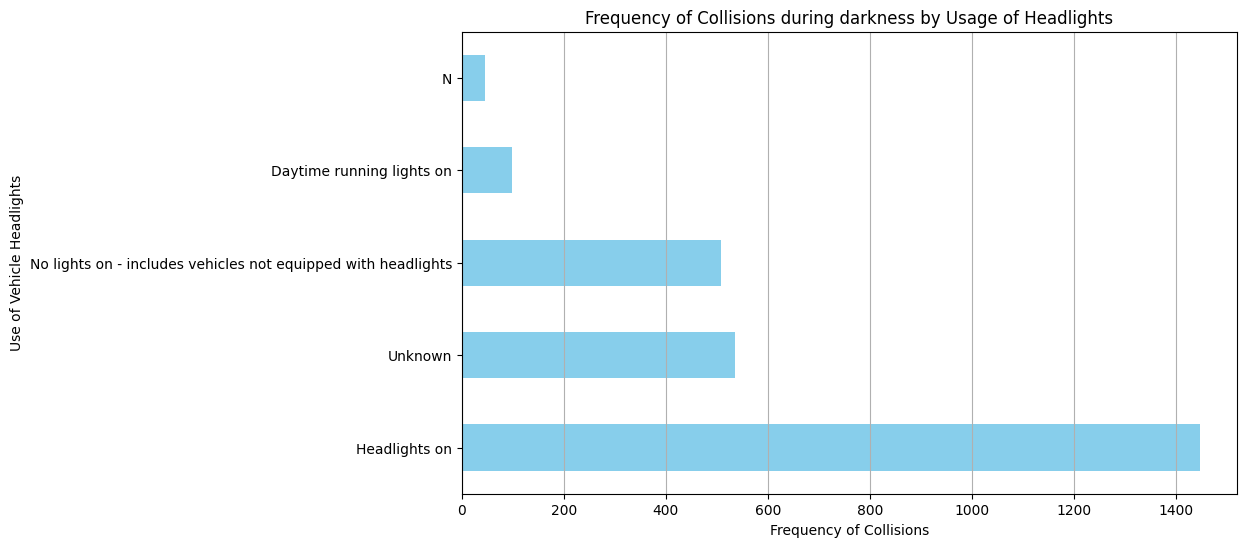

In [ ]:
df_7 = df[
    (df['C_RCL1'] == 'Urban') &
    (df['C_RCL2'] == 'Local') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane') &
    (df['C_LITE'] == 'Darkness')

].copy()

#creating bar charts
plot_horizontal_bar(df_7, 'V_LITE', 'Frequency of Collisions during darkness by Usage of Headlights', 'Use of Vehicle Headlights')

In many of these accidents, vehicle headlights are typically on; however, a significant number occur with headlights not in use.

#### Posted Speed Limit

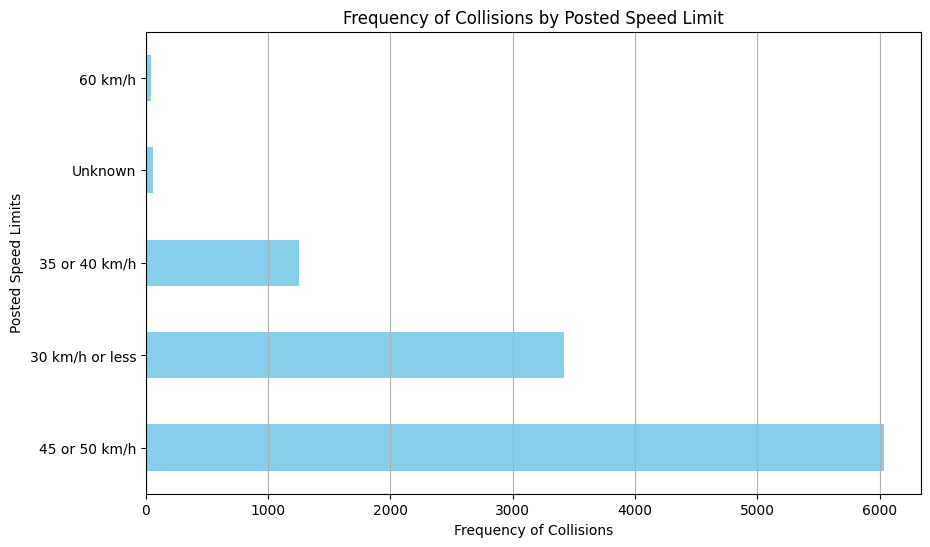

In [ ]:
plot_horizontal_bar(df_6, 'C_SPED', 'Frequency of Collisions by Posted Speed Limit', 'Posted Speed Limits')

The majority of accidents on undivided, two-way, two-lane local roads in urban regions occur below the posted speed limit of 45 km/h to 50 km/h, followed by speeds of 30 km/h and 35 or 40 km/h.

For the purpose of my analysis, we will focus on accidents that occur on undivided, two-way, two-lane local roads at speeds below the posted limit of 45 km/h to 50 km/h to assess whether the driving speeds of the drivers involved in these collisions comply with the posted speed limit.

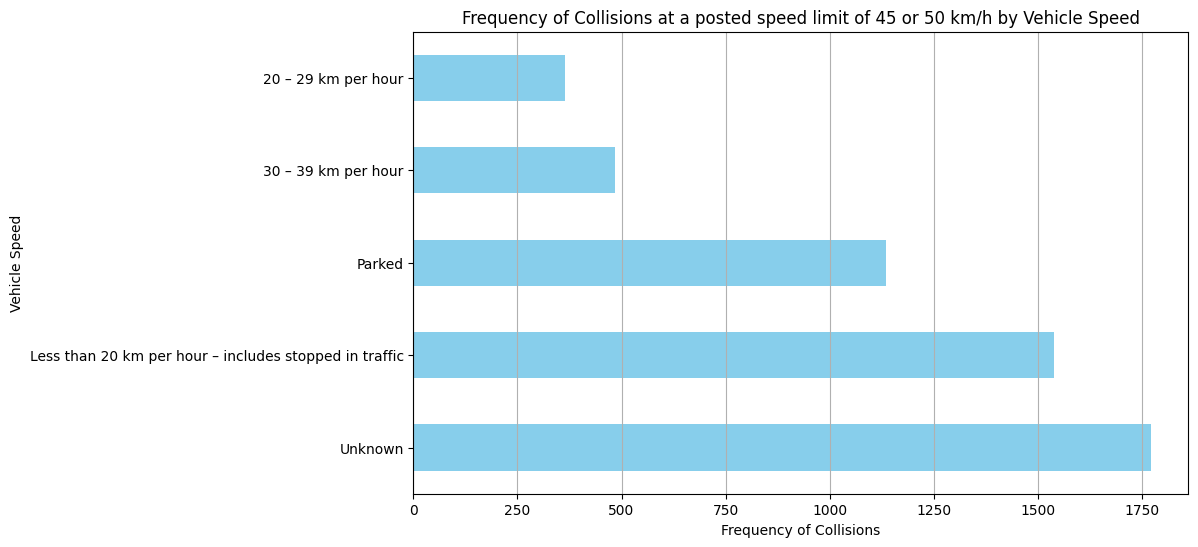

In [ ]:
df_8 = df[
    (df['C_RCL1'] == 'Urban') &
    (df['C_RCL2'] == 'Local') &
    (df['C_RCL3'] == 'Undivided, two – way, two lane') &
    (df['C_SPED'] == '45 or 50 km/h')

].copy()

#creating bar charts
plot_horizontal_bar(df_8, 'V_SPED', 'Frequency of Collisions at a posted speed limit of 45 or 50 km/h by Vehicle Speed', 'Vehicle Speed')

We observe that under the posted speed limit of 45 km/h to 50 km/h, the majority of accidents occur when vehicles are traveling below 20 km/h, typically in traffic or parked suggesting that vehicles are likely to be maneuvering in congested conditions or navigating tight spaces.

Comparatively, fewer accidents occur at speeds between 20-29 km/h and 30-39 km/h.

#### Traffic Control

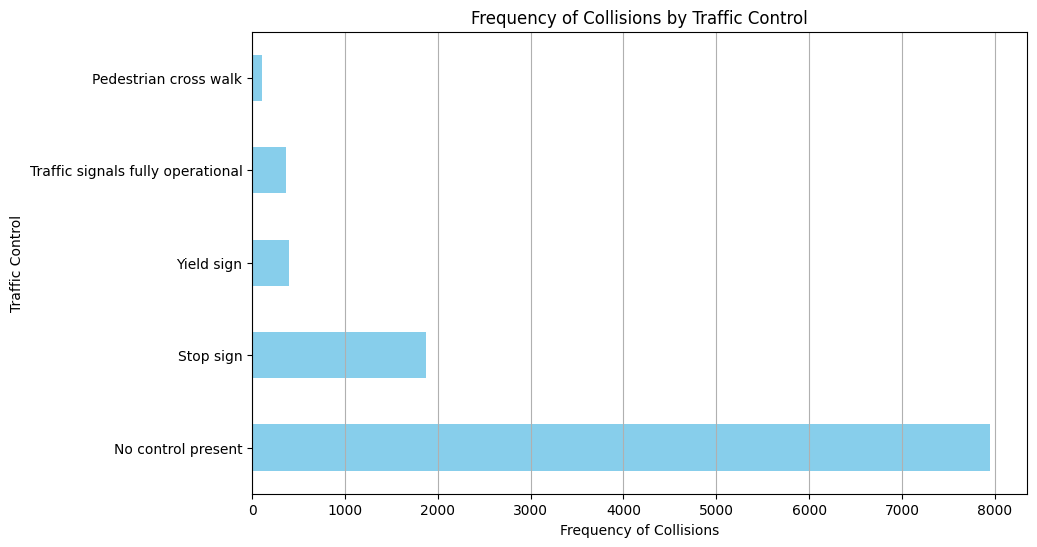

In [ ]:
plot_horizontal_bar(df_6, 'C_TRAF', 'Frequency of Collisions by Traffic Control','Traffic Control')

For local, undivided, two-way, two-lane roads in urban areas, the majority of accidents occur in the absence of traffic control measures. Additionally, there are instances where stop signs are missing. This lack of adequate traffic management highlights the need for improved signage and control mechanisms to enhance road safety.

### 3.4.7 Concluding Analysis for Question 4

 The analysis of collision data on undivided, two-way, two-lane arterial roads in rural regions reveals significant insights into the frequency and conditions of accidents. It highlights that while most collisions occur under good road conditions, a notable number are linked to adverse conditions such as potholes, ruts, and bumps, particularly on roads constructed from gravel or chip seal materials. The findings indicate that the majority of accidents take place during daylight, with a substantial portion occurring at night. Most collisions are associated with high posted speed limits, particularly at 90 km/h, and critical incidents frequently occur at speeds between 80 to 99 km/h. Additionally, the analysis points out the lack of traffic control measures at nearly all collision sites, underscoring a gap in safety protocols. <br>

 Urban regions experience the highest frequency of collisions, primarily occurring on local roads. Most accidents on these roads happen under good road conditions, with very few incidents reported on subpar surfaces. While the majority of collisions occur during daylight, a substantial number also take place at night, often with vehicle headlights on, although a significant portion occurs with headlights off. Notably, most accidents are associated with speeds below the posted limit of 45 km/h to 50 km/h, particularly at speeds under 20 km/h, suggesting that many incidents occur in congested conditions or while maneuvering in tight spaces. The analysis also highlights a concerning trend: the majority of accidents occur in the absence of traffic control measures, with missing stop signs indicating a significant gap in traffic management.

## 3.5 Additional Analysis

**What are the total number of collision accidents for each community in the Northwest Territories (NWT)?**

Visualizing communities on a map, grouped by the number of collisions they experience, provides powerful insights into spatial patterns of road safety and accident hotspots. This type of analysis helps identify areas most prone to collisions, enabling the prioritization of resources for improving road safety, infrastructure, and community awareness. By representing the data geographically, we can easily compare the frequency of accidents across different communities.

In [ ]:
#creating a dataframe that will hold the communities and their corresponding latitudes and longitudes
community_df = pd.DataFrame({
    'Community Name': [
        'YELLOWKNIFE', 'HAY RIVER', 'FORT SMITH', 'FORT MCPHERSON', 'AKLAVIK',
        'FORT LIARD', 'ENTERPRISE', 'NAHANNI BUTTE', 'INUVIK', 'FORT PROVIDENCE',
        'FORT SIMPSON', 'DETTAH', 'FORT RESOLUTION', 'RAE', 'EDZO', 'TULITA', 'WRIGLEY',
        'TUKTOYAKTUK', 'NORMAN WELLS', 'DELINE', 'FORT GOOD HOPE', 'JEAN MARIE RIVER',
        'TSIIGEHTCHIC', 'SACHS HARBOUR', 'KAKISA', 'HOLMAN', "LUTSEL K'E",
        'COLVILLE LAKE', 'TROUT LAKE', 'WHA TI', 'RAE LAKES', 'PAULATUK', 'WEKWEÈTÌ'
    ],
    'Latitude': [None] * 33,
    'Longitude': [None] * 33
})

In [ ]:
import osmnx as ox

In [ ]:
#using osmnx geocode function to look up the communities in NWT and retrieve their latitude and longitude coordinates via geocode
for index, row in community_df.iterrows():
    location = ox.geocode(row['Community Name'] + " Northwest Territories, Canada")
    community_df.at[index, 'Latitude'] = location[0]
    community_df.at[index, 'Longitude'] = location[1]

In [ ]:
#we now see the dataframe with the retrieved longitude and latitude coordinates for all communities in NWT
community_df.head(31)

,Community Name,Latitude,Longitude
0,YELLOWKNIFE,62.454081,-114.377385
1,HAY RIVER,60.815587,-115.78661
2,FORT SMITH,60.005852,-111.890259
3,FORT MCPHERSON,67.436461,-134.883318
4,AKLAVIK,68.218258,-135.013585
5,FORT LIARD,60.240234,-123.442347
6,ENTERPRISE,60.546302,-116.199736
7,NAHANNI BUTTE,61.035173,-123.383622
8,INUVIK,68.360263,-133.720386
9,FORT PROVIDENCE,61.352309,-117.648986


In [ ]:
df['C_COMM'] = df['C_COMM'].replace('WEKWETI', 'WEKWEÈTÌ')

In [ ]:
collisions_by_community = df.groupby('C_COMM').size().reset_index(name='Total Collisions')
collisions_by_community.rename(columns={'C_COMM': 'Community Name'}, inplace=True)

merged_df = pd.merge(community_df, collisions_by_community, on='Community Name', how='left')

In [ ]:
merged_df.head(31)

,Community Name,Latitude,Longitude,Total Collisions
0,YELLOWKNIFE,62.454081,-114.377385,21176
1,HAY RIVER,60.815587,-115.78661,2938
2,FORT SMITH,60.005852,-111.890259,1423
3,FORT MCPHERSON,67.436461,-134.883318,360
4,AKLAVIK,68.218258,-135.013585,200
5,FORT LIARD,60.240234,-123.442347,255
6,ENTERPRISE,60.546302,-116.199736,407
7,NAHANNI BUTTE,61.035173,-123.383622,100
8,INUVIK,68.360263,-133.720386,2941
9,FORT PROVIDENCE,61.352309,-117.648986,592


In [ ]:
import folium

#creating a color palette to map unique color values for each community
color_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#9B59B6',
    '#E74C3C', '#3498DB', '#2ECC71', '#E67E22', '#8E44AD',
    '#1ABC9C', '#F39C12', '#D35400', '#C0392B', '#2C3E50',
    '#7F8C8D', '#BDC3C7', '#95A5A6', '#FFB300', '#F9E79F',
    '#E5E8E8', '#F4D03F', '#C6C6C6', '#EAB8B8', '#A3E4D7',
    '#D5DBDB', '#C39BD3', '#82E0AA', '#F7DC6F', '#F1948A',
    '#E74C3C'
]

m2 = folium.Map(location=[merged_df['Latitude'].mean(), merged_df['Longitude'].mean()], zoom_start=5)

#adding folium markers for each community
for index, row in merged_df.iterrows():
        color = color_palette[index % len(color_palette)]  # Cycle through the color palette
        folium.Marker(
            location=(row['Latitude'], row['Longitude']),
            popup=f"{row['Community Name']}: {row['Total Collisions']} Total Collisions",
            icon=folium.Icon(color='white', icon_color=color, icon='info-sign')  # Set icon color
        ).add_to(m2)

In [ ]:
#displaying the map
m2

# 4) Conclusion and Discussion

**Key Takeaways**:




*   Most collisions involved vehicles licensed under the NWT territories, with Alberta having the second highest - significantly higher than other jurisdictions.
*   Vehicle license years don't suggest that the age of a vehicle does not influence collisions.
* Pickup trucks and Passenger cars are highly prone to be involved in collisions - but in different ways Passenger cars are significantly less likely than pickup trucks to be involved in reversing collisions, whereas Pickup trucks are significantly less likely than all other vehicle types to be involved in parking related collisions.
* Driving straight ahead is the most collision prone maneuver - likely suggesting a lack of attention from drivers.
* Vehicle Headlight usage shows a relatively even distribution of collisions across different usages - primarily indicating that misuse of headlights is likely a huge factor.
* Clustering across vehicle year, type, maneuver shows no promising results - indicating that these variables are primarily independant.
* Most collisions take place in clear weather - serving as both an indication of the number of drivers in the weather but also potentially suggesting complacency as an issue.
* Snow and Rain both seem to elevate the risk of collisions - most of the collisions result in property damage, and fatality is rare among them
* Icy road surfaces result in ~50% of all collisions. Furthermore, while normal roads make up almost ~25% of it, the rest of the collisions are all made of up road surfaces that are a consequence of rain/snow. Suggesting that these are highly risk prone surfaces to drive on.
* Icy roads also display a higher rate of injury, when compared to other road conditions.
* Most collisions occur when there is daylight, but collisions in lower light tend to have more severe outcomes.
* The negative binomial model shows that all the variables related to Road Surface Condition, Weather, and Light are statistically significant in their effects on accident count, except for dawn under Light Condition and wet under Road Surface Condition
* Most collisions do not involve alcohol.
* Collisions that do involve alcohol present a significantly higher fatality than the ones that do not - 1200% higher.
* Collisions that involve alcohol also present a significantly higher injury rate - 300% higher.
* Collisions involving alcohol are steadily decreasing over time.
* Urban areas experience significantly more collisions that rural areas - both show significant collisions in arterial roads, with urban areas having a significant number of collisions in local roads as well.
* For rural roads, a significant number of collisions involved poor road quality. Things such as - uneven roads, potholes, or roads under repair
* This aligns with the findings that rural roads are primarily made up of grave - and the above mentioned issues are found in gravel based roads.
* Most rural road collisions occur at areas with high posted speed limits. With the most frequent speed limit being 90 km/h.
* At 90km/h posted speed limit rural collisions most vehicles are found to be at 90-99 km/h. With the second most being 80-90 km/h. Furthermore, a significant chunk of collisions also involved vehicles speeding higher than the limit.
* Most rural collisions show now traffic control present.
* In contrast, most urban road collisions involve speed limits posted of around 45km/h, with the second most frequent being around 30km/h.
* Most collisions that take place at around this speed limit involve the vehicle either being stopped in traffic or going less than 20km/h. We also see a significant number of accidents occuring when the vehicle is parked. We also notice that at lower speeds 20-39 km/h fewer collisions occur. Highly suggesting that fully stopping or slowing down has a consequence in these collisions occurring
* Urban roads also sport limited traffic control for most collisions, but unlike rural roads show a significant chunk of collisions occurring with stop or yield signs.


# 5) References and AI use

[1] T, Mr. ‘Answer to “Show Count and Percentage Labels for Grouped Bar Chart Python”’. Stack Overflow, 15 Jan. 2021, https://stackoverflow.com/a/65743506.

[2] tacaswell. ‘Answer to “What Are Patches in Python?”’ Stack Overflow, 11 Apr. 2015, https://stackoverflow.com/a/29584047.

[3] Matplotlib.Patches — Matplotlib 3.9.2 Documentation. https://matplotlib.org/stable/api/patches_api.html. Accessed 17 Oct. 2024.

[4] Overview of Seaborn Plotting Functions — Seaborn 0.13.2 Documentation. https://seaborn.pydata.org/tutorial/function_overview.html. Accessed 17 Oct. 2024

[5] Seaborn.Countplot — Seaborn 0.13.2 Documentation. https://seaborn.pydata.org/generated/seaborn.countplot.html. Accessed 17 Oct. 2024.

[6] Pandas.Series.Value_counts — Pandas 2.2.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html. Accessed 17 Oct. 2024.

[7] Matplotlib.Pyplot.Annotate — Matplotlib 3.9.2 Documentation. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html. Accessed 17 Oct. 2024.

[8] cosmosis. ‘Answer to “How Can I Display Text over Columns in a Bar Chart in Matplotlib?”’ Stack Overflow, 14 Sept. 2011, https://stackoverflow.com/a/7423575.

[9] Python Map() Function. https://www.w3schools.com/python/ref_func_map.asp. Accessed 17 Oct. 2024.

[10] Harika. ‘KModes Clustering Algorithm for Categorical Data’. Analytics Vidhya, 13 June 2021, https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/.

[11] Wattenberg, Martin, et al. ‘How to Use T-SNE Effectively’. Distill, vol. 1, no. 10, Oct. 2016, p. e2. distill.pub, https://doi.org/10.23915/distill.00002.

# 6) Appendix

Github link to python code used for intial eda for tableua visualizations:
https://github.com/ClownEmojiIsHumor/Car_Crash_Investigation